# Travel Package Purchase Prediction

## Assignment details
https://olympus.greatlearning.in/courses/40608/assignments/123646


### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisited: Total number of person came with customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of the trip in a year by customer
* Passport: The customer has passport or not
* OwnCar: Customers owns a car flag
* NumberOfChildrenVisited: Total number of children visit with customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfactory score
* ProductPitched: Product pitched by a salesperson
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* DurationOfPitch: Duration of the pitch by a salesman to customer


In [1]:
# standard imports 
# note i had to install xgboost via pip as it is external package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn stuff
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#ensemble apis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Load Dataset

In [2]:
data_orig= pd.read_excel('Tourism.xlsx',sheet_name='Tourism')

In [4]:
# copying data to another varaible to avoid any changes to original data
data=data_orig.copy()

# Head and tail to see what is up with the DS

In [5]:
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0        Salaried  Female                      3                3.0   
1        Salaried    Male                      3                4.0   
2     Free Lancer    Male                      3                4.0   
3        Salaried  Female                      2                3.0   
4  Small Business    Male                      2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0         1                       2       1                      0.0   
1         0                       3       1                      2.0   
2         1                       3       0                      0.0   
3         1                       5       1                      1.0   
4         0                       5       1                      0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [6]:
data.tail()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
4883  Small Business    Male                      3                5.0   
4884        Salaried    Male                      4                5.0   
4885        Salaried  Female                      4                4.0   
4886  Small Business    Male                      3                4.0   
4887        Salaried    Male                      4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
4883         1                       1       1                      1.0   
4884         1                       3       1                      2.0   
4885         0                       1       1                      3.0   
4886         0                       5       0                      2.0   
4887         1                       3       1                      2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

### Exploring the DS

In [8]:
# Shape? 
data.shape

(4888, 20)

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

## Observations
- TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation are Object.
- Passport,PitchSatisfactionScore,CustomerID,ProdTaken,CityTier,NumberOfPersonVisited, variables are of type int64.
- Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisited,MonthlyIncome are float64.


# Sanitizing the data - find null, duplicates, irrelevant columns

In [10]:
#count the number of variables in each datatype
data.dtypes.value_counts()

float64    7
int64      7
object     6
dtype: int64

In [11]:
# dups
sum(data.duplicated())

0

In [13]:
# NOTE - Profile- takes a 1 min
# This will allow me to see once glance data which needs to change type  /missing values for imputation
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
# Conver object to categorical 
for col in data.columns: 
    if data[col].dtype == 'object':
        data[col] = pd.Categorical(data[col])
data.sample(n=5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
1994      201994          0  34.0     Self Enquiry         1             15.0   
222       200222          0  37.0  Company Invited         1             17.0   
2742      202742          0  37.0  Company Invited         1             25.0   
2663      202663          0  55.0     Self Enquiry         3             10.0   
23        200023          0  21.0     Self Enquiry         1             21.0   

          Occupation   Gender  NumberOfPersonVisited  NumberOfFollowups  \
1994  Small Business  Fe Male                      2                4.0   
222         Salaried     Male                      2                3.0   
2742        Salaried     Male                      3                3.0   
2663  Small Business   Female                      3                4.0   
23          Salaried     Male                      3                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
1994       Standard                    4.0     Unmarried            2.0   
222        Standard                    3.0       Married            2.0   
2742          Basic                    3.0      Divorced            6.0   
2663         Deluxe                    5.0      Divorced            4.0   
23            Basic                    3.0        Single            2.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
1994         0                       1       1                      0.0   
222          1                       3       0                      1.0   
2742         0                       5       0                      1.0   
2663         0                       4       1                      2.0   
23           0                       3       1                      1.0   

         Designation  MonthlyIncome  
1994  Senior Manager        23621.0  
222   Senior Manager        27185.0  
2742       Executive        22366.0  
2663         Manager        24618.0  
23         Executive        16232.0

In [14]:
 data.describe()   

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisited  NumberOfFollowups  PreferredPropertyStar  \
count            4888.000000        4843.000000            4862.000000   
mean                2.905074           3.708445               3.581037   
std                 0.724891           1.002509               0.798009   
min                 1.000000           1.000000               3.000000   
25%                 2.000000           3.000000               3.000000   
50%                 3.000000           4.000000               3.000000   
75%                 3.000000           4.000000               4.000000   
max                 5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4748.000000  4888.000000             4888.000000  4888.000000   
mean        3.236521     0.290917                3.078151     0.620295   
std         1.849019     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisited  MonthlyIncome  
count              4822.000000    4655.000000  
mean                  1.187267   23619.853491  
std                   0.857861    5380.698361  
min                   0.000000    1000.000000  
25%                   1.000000   20346.000000  
50%                   1.000000   22347.000000  
75%                   2.000000   25571.000000  
max                   3.000000   98678.000000

### Observations 

- ProdTaken is the dependent variable
- Avg age is ~ 37yrs
- some missing values in Age,DurationofPitch,TypeofContact,MonthlyIncome,NumberOfChildrenVisited,NumberOfTrips,PreferredPropertyStar and NumberOfFollowups variables.
- The average age of a person is 37.6yrs ,while the minimum age is 18yrs and the maximum age is 61yrs.The median value is 36yrs. Age is normally distriuybed
- Average DurationOfPitch variable is 15.49,min is 5, max value at 127 and P_75% value at 20. Presence of outliers
- Occupation variable has 4 unique types with Salaried customers being the most. 
- Designation variable has 4 unique classes and there are more executive customers compared to others.
- MonthlyIncome variable has some missing values with the mean 23619.853491 and the median 22347.0. The minimum value is 1000, with third quantile at 25571 and max value at 98678 indicating that the variable is highly right skewed.

## Further explorations to see if we can sanitize further the DS

In [37]:
# checking for unique values in ID column
data["CustomerID"].nunique()

KeyError: 'CustomerID'

In [38]:
# drop it - no added valued
data.drop(["CustomerID"],axis=1,inplace=True)

KeyError: "['CustomerID'] not found in axis"

In [39]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [40]:
data["Age"].unique()

array([41., 49., 37., 33., nan, 32., 59., 30., 38., 36., 35., 31., 34.,
       28., 29., 22., 53., 21., 42., 44., 46., 39., 24., 43., 50., 27.,
       26., 48., 55., 45., 56., 23., 51., 40., 54., 58., 20., 25., 19.,
       57., 52., 47., 18., 60., 61.])

In [41]:
data["TypeofContact"].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

Null vals in TypeOfContact

In [42]:
data["CityTier"].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

In [43]:
data["DurationOfPitch"].unique()

array([  6.,  14.,   8.,   9.,  30.,  29.,  33.,  22.,  21.,  32.,  25.,
        27.,  11.,  17.,  15.,  13.,  12.,  16.,  10.,  31.,  18.,  nan,
        24.,  35.,  28.,  20.,  26.,  34.,  23.,   5.,  19., 126.,   7.,
        36., 127.])

There are Null Values in DurationOfPitch variable

In [44]:
data["Occupation"].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [45]:
data["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Look at that typo in Fe Male - need to fix that

In [46]:
# Change Fe Male to Female
data.Gender.replace('Fe Male','Female',inplace=True)

In [47]:
data["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [48]:
data["NumberOfPersonVisited"].value_counts()

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64

In [49]:
data["NumberOfFollowups"].value_counts()

4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

In [50]:
data["ProductPitched"].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [51]:
data["PreferredPropertyStar"].value_counts()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

In [52]:
data["MaritalStatus"].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [53]:
data["NumberOfTrips"].value_counts()

2.0     1464
3.0     1079
1.0      620
4.0      478
5.0      458
6.0      322
7.0      218
8.0      105
20.0       1
19.0       1
22.0       1
21.0       1
Name: NumberOfTrips, dtype: int64

In [54]:
data["Passport"].value_counts()

0    3466
1    1422
Name: Passport, dtype: int64

In [55]:
data["PitchSatisfactionScore"].value_counts()

3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64

In [56]:
data["OwnCar"].value_counts()

1    3032
0    1856
Name: OwnCar, dtype: int64

In [57]:
data["Designation"].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [58]:
data["MonthlyIncome"].unique()

array([20993., 20130., 17090., ..., 22097., 22995., 21471.])

In [59]:
data["ProdTaken"].value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

### Check for missing values

In [61]:
data.isnull().sum().sort_values()

ProdTaken                    0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
MaritalStatus                0
Designation                  0
NumberOfPersonVisited        0
ProductPitched               0
Occupation                   0
CityTier                     0
Gender                       0
TypeofContact               25
PreferredPropertyStar       26
NumberOfFollowups           45
NumberOfChildrenVisited     66
NumberOfTrips              140
Age                        226
MonthlyIncome              233
DurationOfPitch            251
dtype: int64

## EDA

### Univariate analysis

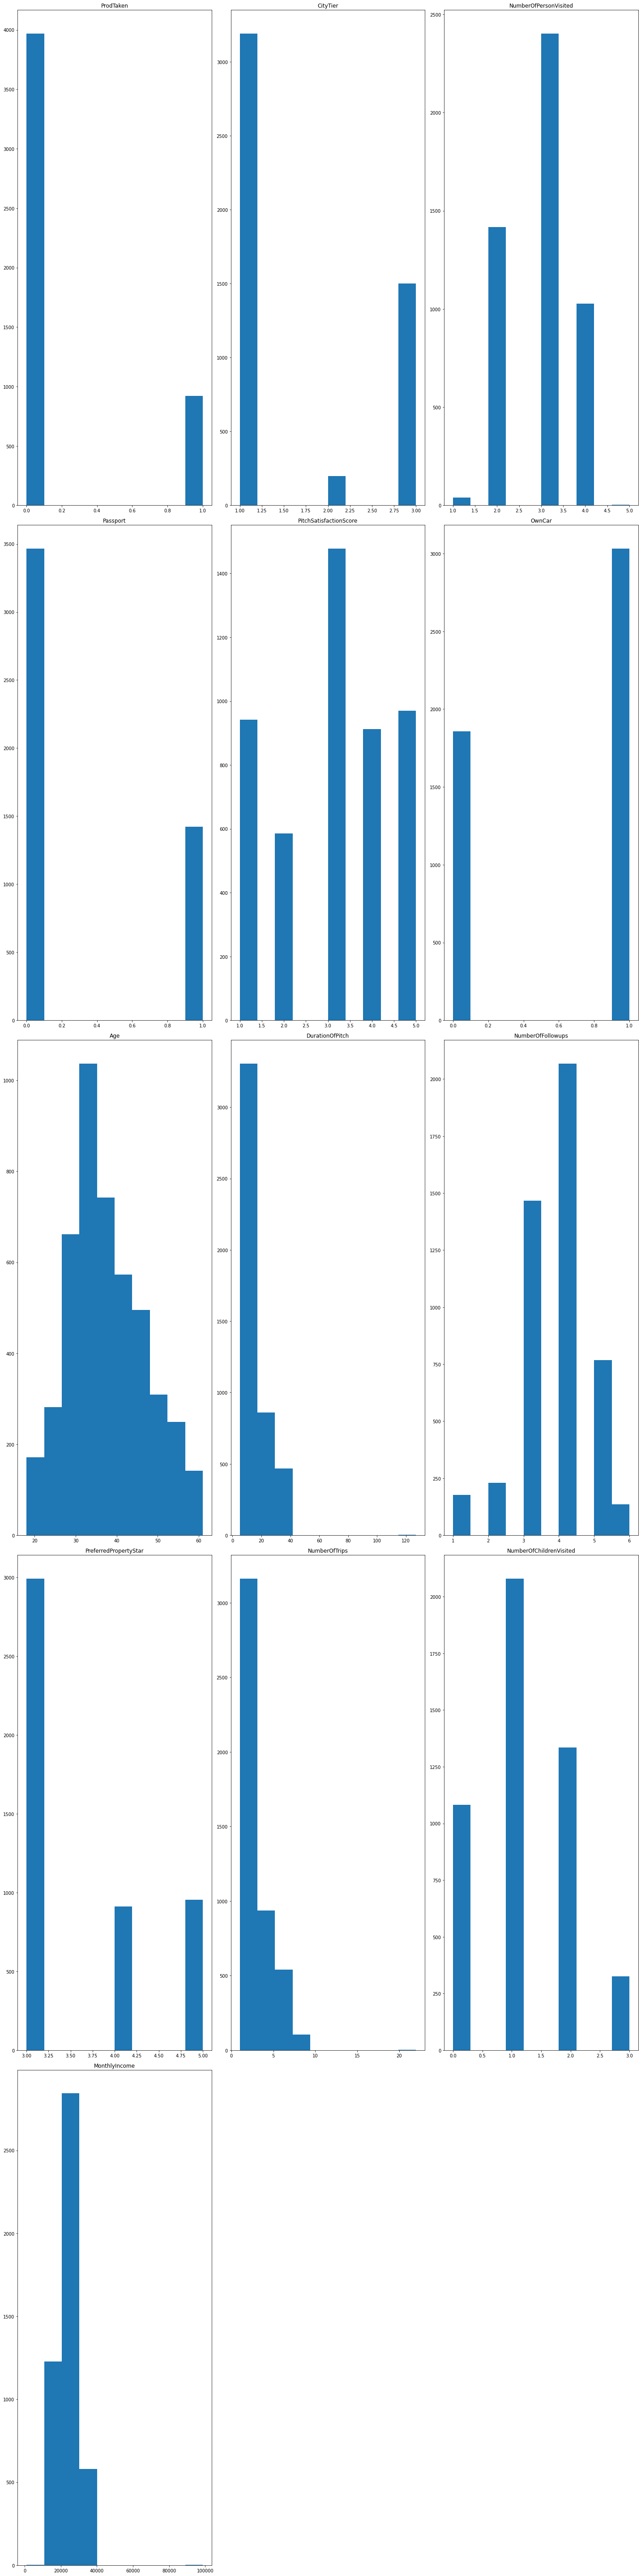

In [77]:
# Print all numeric columns
cols_numeric=['ProdTaken','CityTier','NumberOfPersonVisited','Passport','PitchSatisfactionScore','OwnCar','Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisited','MonthlyIncome']
plt.figure(figsize=(20,80))

for i in range(len(cols_numeric)):
    plt.subplot(5,3,i+1)
    plt.hist(data[cols_numeric[i]])
    plt.tight_layout()
    plt.title(cols_numeric[i])
    
plt.show()

<AxesSubplot:xlabel='Age'>

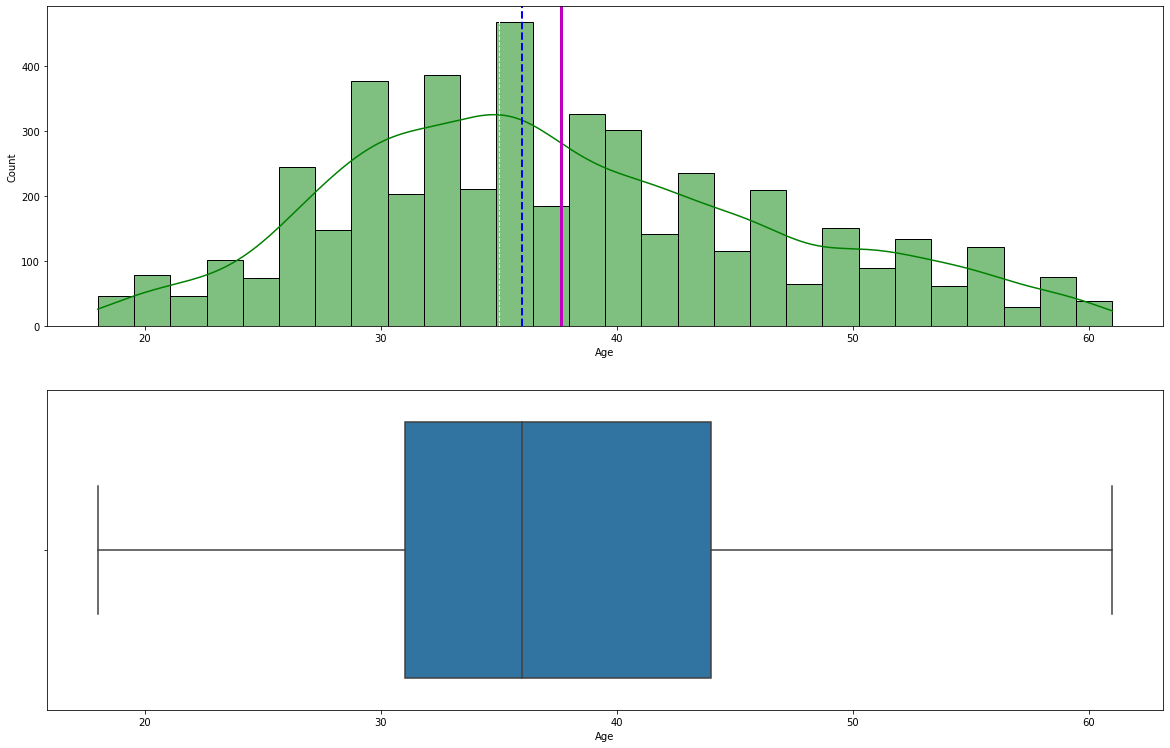

In [66]:
#View the distribution of the Age variable
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.histplot(x=data.Age,color="green",kde=True);
plt.axvline(data["Age"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(data["Age"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(data["Age"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=data.Age)

## Observations:
- Age normal distribution with mean 37yrs, med 36 yrs (similar observations during the data exploration)

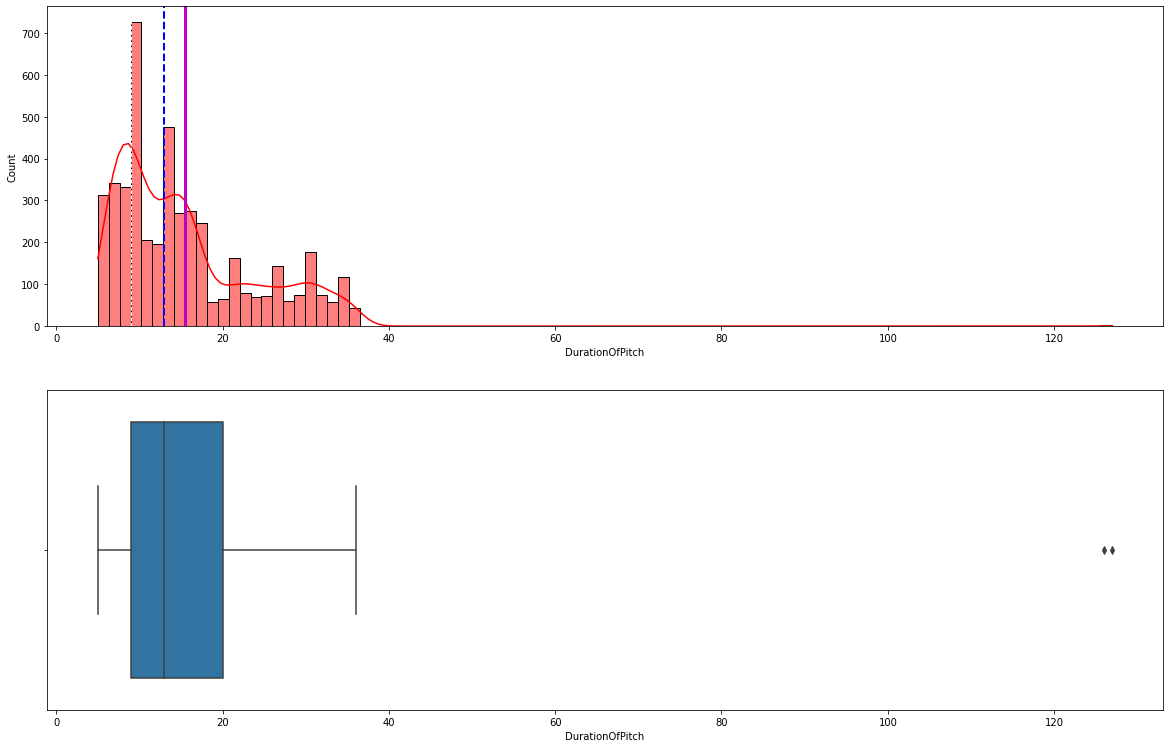

In [70]:
#View the distribution of the DurationOfPitch variable
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.histplot(x=data.DurationOfPitch,color="red",kde=True);
plt.axvline(data["DurationOfPitch"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(data["DurationOfPitch"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(data["DurationOfPitch"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=data.DurationOfPitch);

Observations:
- Duration right skew with outliers 

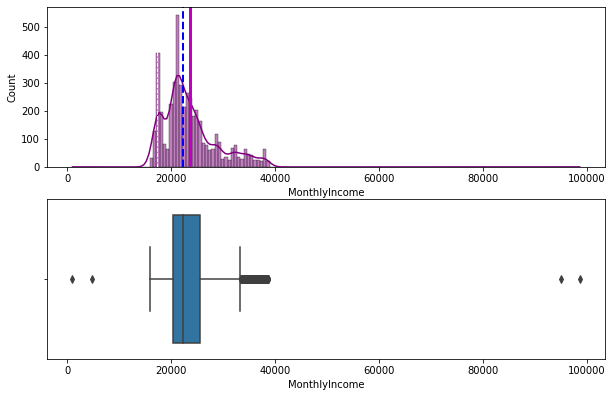

In [72]:
#View the distribution of the MonthlyIncome variable
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.histplot(x=data.MonthlyIncome,color="purple",kde=True);
plt.axvline(data["MonthlyIncome"].mean(),color='m',linewidth=3)# draw a line indicating mean
plt.axvline(data["MonthlyIncome"].median(),color='b',linestyle='dashed',linewidth=2)# draw a line indicating median
plt.axvline(data["MonthlyIncome"].mode()[0],color='w',linestyle='dashed',linewidth=1)# draw a line indicating mode
plt.subplot(3,1,2)
sns.boxplot(x=data.MonthlyIncome);


## Observations
- MonthlyIncome has outliers on left/right whisker

# Analyze categorical variables

In [78]:
# Function from lecture notes to create barplots - with % per cat
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

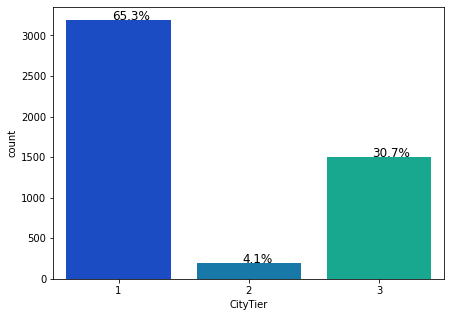

In [80]:
#Look at CityTier size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["CityTier"],palette='winter');
bar_perc(ax,data["CityTier"])

Observations:
- More cust in Tier1 that 2/3

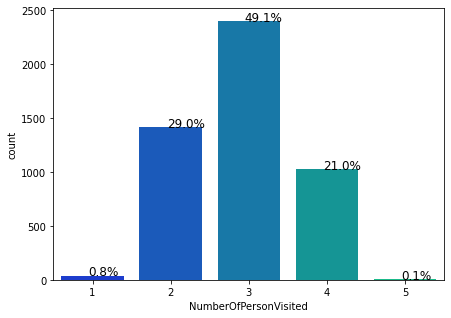

In [81]:
#View the countplot on NumberOfPersonVisited size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["NumberOfPersonVisited"],palette='winter');
bar_perc(ax,data["NumberOfPersonVisited"])

# Observations:
- Majority have = 3 persons together
- Minority have > 5 persons together 

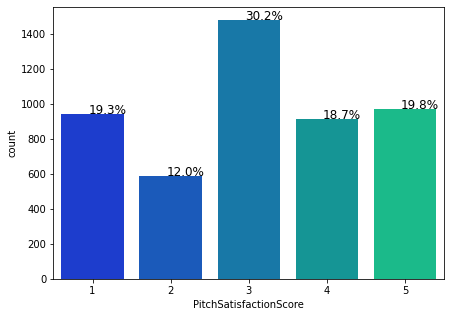

In [82]:
#View the countplot on PitchSatisfactionScore size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["PitchSatisfactionScore"],palette='winter');
bar_perc(ax,data["PitchSatisfactionScore"])

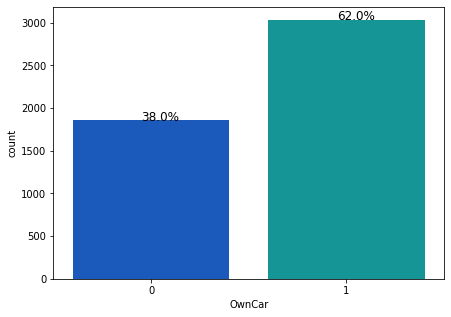

In [83]:
#View the countplot on OwnCar size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["OwnCar"],palette='winter');
bar_perc(ax,data["OwnCar"])

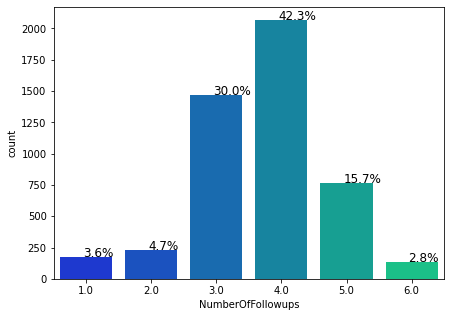

In [84]:
#View the countplot on NumberOfFollowups size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["NumberOfFollowups"],palette='winter');
bar_perc(ax,data["NumberOfFollowups"])

## Observations:
- 42% of customers follow up after sales pitch

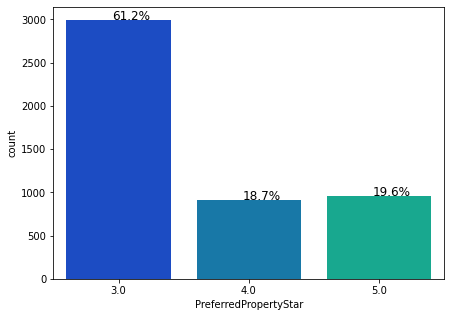

In [91]:
#View PreferredPropertyStar size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["PreferredPropertyStar"],palette='winter');
bar_perc(ax,data["PreferredPropertyStar"])

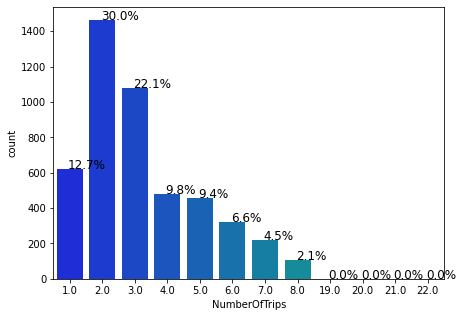

In [89]:
#View NumberOfTrips 
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["NumberOfTrips"],palette='winter');
bar_perc(ax,data["NumberOfTrips"])

## Observations:
- Most make >2 trips / yr

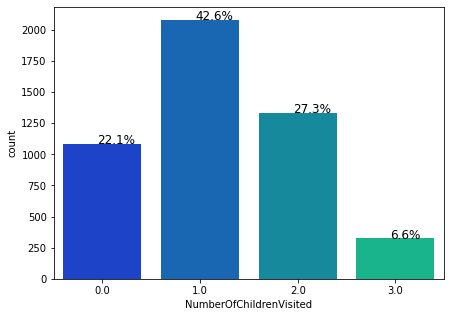

In [90]:
#View NumberOfChildrenVisited size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["NumberOfChildrenVisited"],palette='winter');
bar_perc(ax,data["NumberOfChildrenVisited"])

## Observations:
- Most accompanied with kids

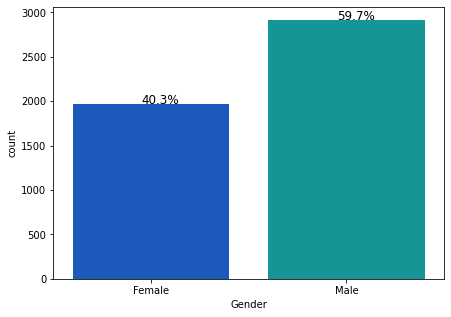

In [93]:
#Gender size
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data["Gender"],palette='winter');
bar_perc(ax,data["Gender"])

## Observations:
- Most are male

## Bivariate analysis

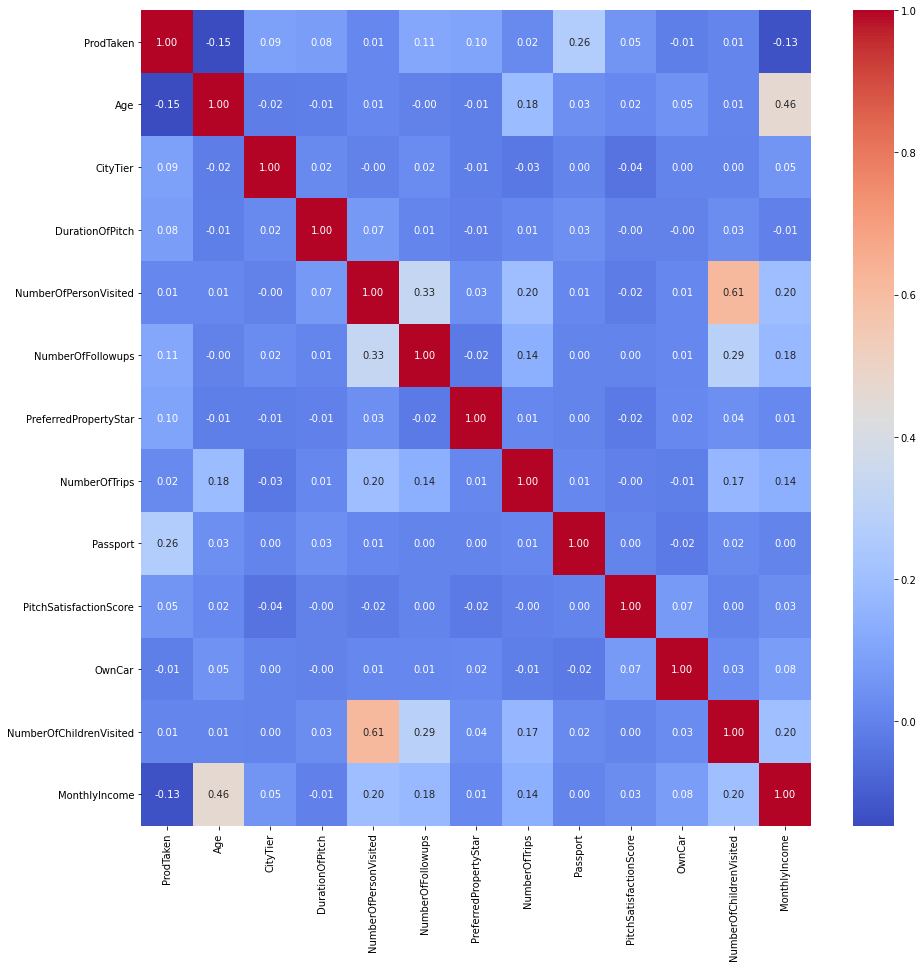

In [94]:
corr=data.corr()   
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

Observations:
- Age,MonthlyIncome have a strong +ve correlation.
- NumberofPersonVisited, NumberofChildrenVisited have strong correlation.
- ProdTaken has +ve corr. with passport.


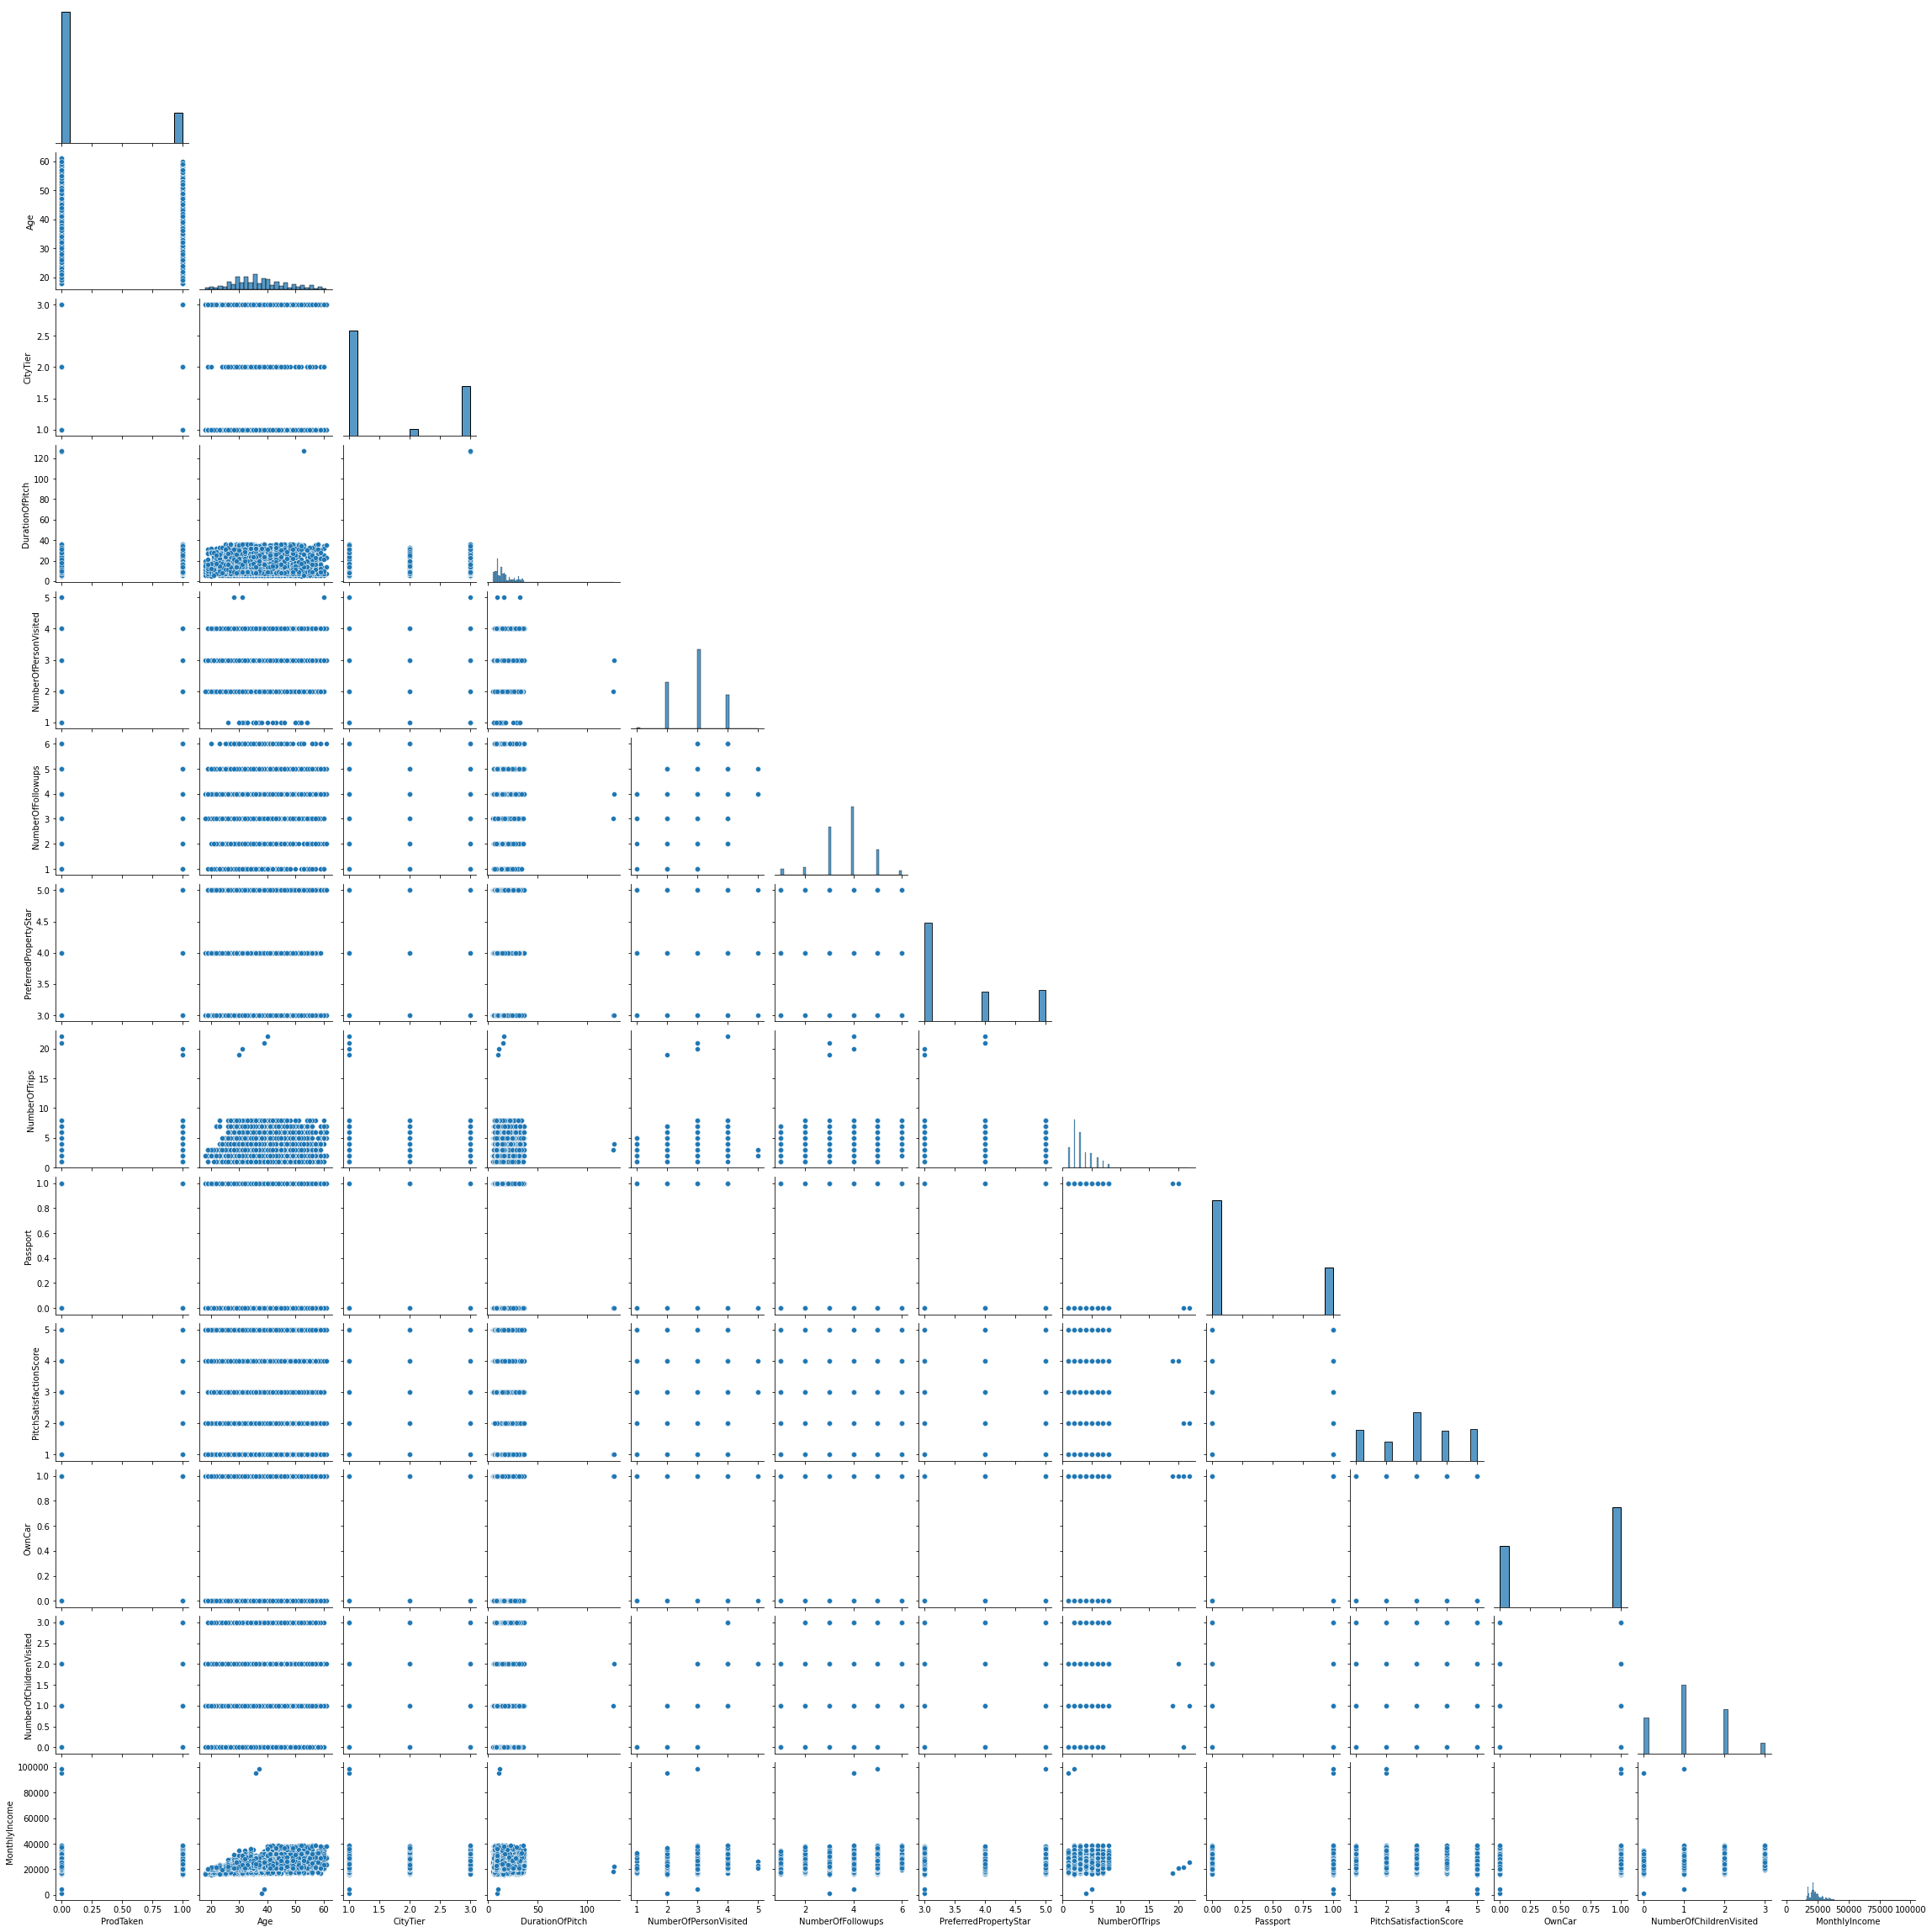

In [95]:
sns.pairplot(data, corner=True);

### Key Observations - 
* CityTier,NumberOfPersonVisited,TypeofContact,Occupation,ProductPitched,MaritalStatus,Designation,Passport,PitchSatisfactionScore,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips show good indicators of buyng package

### Relation between ProductPitched (target variable)vs other independent variables

In [105]:
## Utility to plot stacked bar chart - src Course Notes
def stacked_plot_util(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['ProductPitched'],margins=True)
    print(tab1)
    print('-'*120)
    tab2 = pd.crosstab(x,data['ProductPitched'],normalize='index')
    tab2.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.show()

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Age                                                              
18.0               14       0     0         0             0    14
19.0               31       0     0         1             0    32
20.0               37       0     0         1             0    38
21.0               40       1     0         0             0    41
22.0               43       3     0         0             0    46
23.0               41       5     0         0             0    46
24.0               46      10     0         0             0    56
25.0               43      31     0         0             0    74
26.0               61      44     0         1             0   106
27.0               83      45     1         9             0   138
28.0               91      43     1        12             0   147
29.0              109      52     0        16             1   178
30.0              105      67     0        26             1   199
31.0      

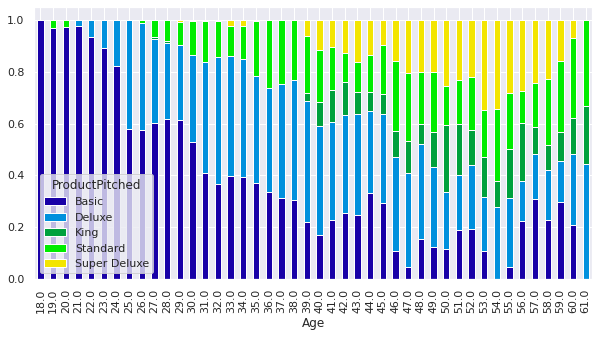

In [106]:
stacked_plot_util(data['Age'])

## Observations
- Basic Package -> targeted to  25.
- Super Deluxe and King -> customers aged above 39.

# Observations from EDA

- Customers prefer Basic and Deluxe packages over the others. 
- Executives prefer basic, managers prefer deluxe, senior managers prefer standard, AVPs and VPs prefer super deluxe and king packages respectively. 
- Unmarried people are more likely to make trips followed by married, divorced, and single. 
- Younger people tend to prefer basic packages.

# Fix missing values

In [112]:
# looking at which columns have the most missing values
data.isnull().sum().sort_values() 

ProdTaken                    0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
MaritalStatus                0
Designation                  0
NumberOfPersonVisited        0
ProductPitched               0
Occupation                   0
CityTier                     0
Gender                       0
TypeofContact               25
PreferredPropertyStar       26
NumberOfFollowups           45
NumberOfChildrenVisited     66
NumberOfTrips              140
Age                        226
MonthlyIncome              233
DurationOfPitch            251
dtype: int64

In [117]:
# Impute missing DurationOfPitch,NumberOfTrips,NumberOfChildrenVisited,NumberOfFollowups
data["Age"] = data["Age"].transform(
    lambda x: x.fillna(x.median())
)
data["DurationOfPitch"] = data["DurationOfPitch"].transform(
    lambda x: x.fillna(x.median())
)
data["NumberOfTrips"] = data["NumberOfTrips"].transform(
    lambda x: x.fillna(x.median())
)
data["NumberOfChildrenVisited"] = data["NumberOfChildrenVisited"].transform(
    lambda x: x.fillna(x.median())
)
data["NumberOfFollowups"] = data["NumberOfFollowups"].transform(
    lambda x: x.fillna(x.median())
)
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].transform(
    lambda x: x.fillna(x.median())
)
data["TypeofContact"] = data['TypeofContact'].fillna(data.TypeofContact.mode()[0])

In [118]:
data.isnull().sum().sort_values() 

ProdTaken                    0
NumberOfChildrenVisited      0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
MaritalStatus                0
PreferredPropertyStar        0
Designation                  0
ProductPitched               0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
TypeofContact                0
Age                          0
NumberOfFollowups            0
MonthlyIncome              233
dtype: int64

### Create Dummy variables

In [119]:
data=pd.get_dummies(data, columns=["TypeofContact", "Occupation","Gender","ProductPitched","MaritalStatus","Designation"],prefix=["TypeofContact", "Occupation","Gender","ProductPitched","MaritalStatus","Designation"], drop_first=True)


In [120]:
data_cat=data['ProdTaken']

In [121]:
# Dropping the columns which are not required while imputation.
data.drop(['ProdTaken'], axis=1,inplace=True)

In [123]:
# External package used pip to install it
#  https://stackoverflow.com/questions/44239269/fancyimpute-installation-in-anaconda
from fancyimpute import KNN
# calling the KNN class
knn_imputer = KNN()
# imputing the missing value with knn imputer
imputed_data = knn_imputer.fit_transform(data)
data = pd.DataFrame(imputed_data,columns=data.columns)

Imputing row 1/4888 with 0 missing, elapsed time: 4.181
Imputing row 101/4888 with 0 missing, elapsed time: 4.182
Imputing row 201/4888 with 1 missing, elapsed time: 4.183
Imputing row 301/4888 with 0 missing, elapsed time: 4.183
Imputing row 401/4888 with 0 missing, elapsed time: 4.184
Imputing row 501/4888 with 0 missing, elapsed time: 4.184
Imputing row 601/4888 with 0 missing, elapsed time: 4.185
Imputing row 701/4888 with 0 missing, elapsed time: 4.186
Imputing row 801/4888 with 0 missing, elapsed time: 4.186
Imputing row 901/4888 with 0 missing, elapsed time: 4.187
Imputing row 1001/4888 with 0 missing, elapsed time: 4.187
Imputing row 1101/4888 with 0 missing, elapsed time: 4.188
Imputing row 1201/4888 with 0 missing, elapsed time: 4.189
Imputing row 1301/4888 with 0 missing, elapsed time: 4.189
Imputing row 1401/4888 with 0 missing, elapsed time: 4.190
Imputing row 1501/4888 with 0 missing, elapsed time: 4.191
Imputing row 1601/4888 with 0 missing, elapsed time: 4.191
Imputing 

In [124]:
# Concatenate the two dataframes(missing value imputed variables with other target variable that we separated before imputation)
data=pd.concat([data,data_cat],axis=1)

In [125]:
data.columns

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male',
       'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'ProdTaken'],
      dtype='object')

In [126]:
data.head()

Age  CityTier  DurationOfPitch  NumberOfPersonVisited  NumberOfFollowups  \
0  41.0       3.0              6.0                    3.0                3.0   
1  49.0       1.0             14.0                    3.0                4.0   
2  37.0       1.0              8.0                    3.0                4.0   
3  33.0       1.0              9.0                    2.0                3.0   
4  36.0       1.0              8.0                    2.0                3.0   

   PreferredPropertyStar  NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0            1.0       1.0                     2.0   
1                    4.0            2.0       0.0                     3.0   
2                    3.0            7.0       1.0                     3.0   
3                    3.0            2.0       1.0                     5.0   
4                    4.0            1.0       0.0                     5.0   

   OwnCar  ...  ProductPitched_Standard  ProductPitched_Super Deluxe  \
0     1.0  ...                      0.0                          0.0   
1     1.0  ...                      0.0                          0.0   
2     0.0  ...                      0.0                          0.0   
3     1.0  ...                      0.0                          0.0   
4     1.0  ...                      0.0                          0.0   

   MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
0                    0.0                   1.0                      0.0   
1                    0.0                   0.0                      0.0   
2                    0.0                   1.0                      0.0   
3                    0.0                   0.0                      0.0   
4                    0.0                   0.0                      0.0   

   Designation_Executive  Designation_Manager  Designation_Senior Manager  \
0                    0.0                  1.0                         0.0   
1                    0.0                  1.0                         0.0   
2                    1.0                  0.0                         0.0   
3                    1.0                  0.0                         0.0   
4                    1.0                  0.0                         0.0   

   Designation_VP  ProdTaken  
0             0.0          1  
1             0.0          0  
2             0.0          1  
3             0.0          0  
4             0.0          0  

[5 rows x 29 columns]

In [128]:
# look at which columns have the most missing values
data.isnull().sum().sort_values(ascending=False) 

Age                            0
Occupation_Small Business      0
Designation_VP                 0
Designation_Senior Manager     0
Designation_Manager            0
Designation_Executive          0
MaritalStatus_Unmarried        0
MaritalStatus_Single           0
MaritalStatus_Married          0
ProductPitched_Super Deluxe    0
ProductPitched_Standard        0
ProductPitched_King            0
ProductPitched_Deluxe          0
Gender_Male                    0
Occupation_Salaried            0
CityTier                       0
Occupation_Large Business      0
TypeofContact_Self Enquiry     0
MonthlyIncome                  0
NumberOfChildrenVisited        0
OwnCar                         0
PitchSatisfactionScore         0
Passport                       0
NumberOfTrips                  0
PreferredPropertyStar          0
NumberOfFollowups              0
NumberOfPersonVisited          0
DurationOfPitch                0
ProdTaken                      0
dtype: int64

### Observations 
ZERO!! Hoho!!

## Outliers detect and annihilate maybe?

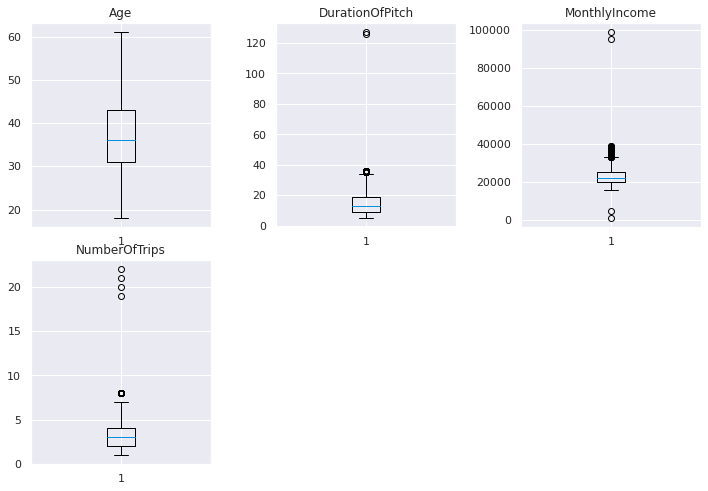

In [132]:
numeric_columns=['Age','DurationOfPitch','MonthlyIncome','NumberOfTrips']
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(10,10))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(3,3,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [134]:
# Utiliy Move all outliers at 3.5IQ
def _outliers(df,col):
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    MAX_CAP=3.5*IQR
    Lower_Whisker = Q1 - MAX_CAP 
    Upper_Whisker = Q3 + MAX_CAP
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def utility_process_outliers(df, col_list):
    for c in col_list:
        df = _outliers(df,c)
        
    return df
    

## Treating Outliers

In [135]:
data = utility_process_outliers(data,numeric_columns)

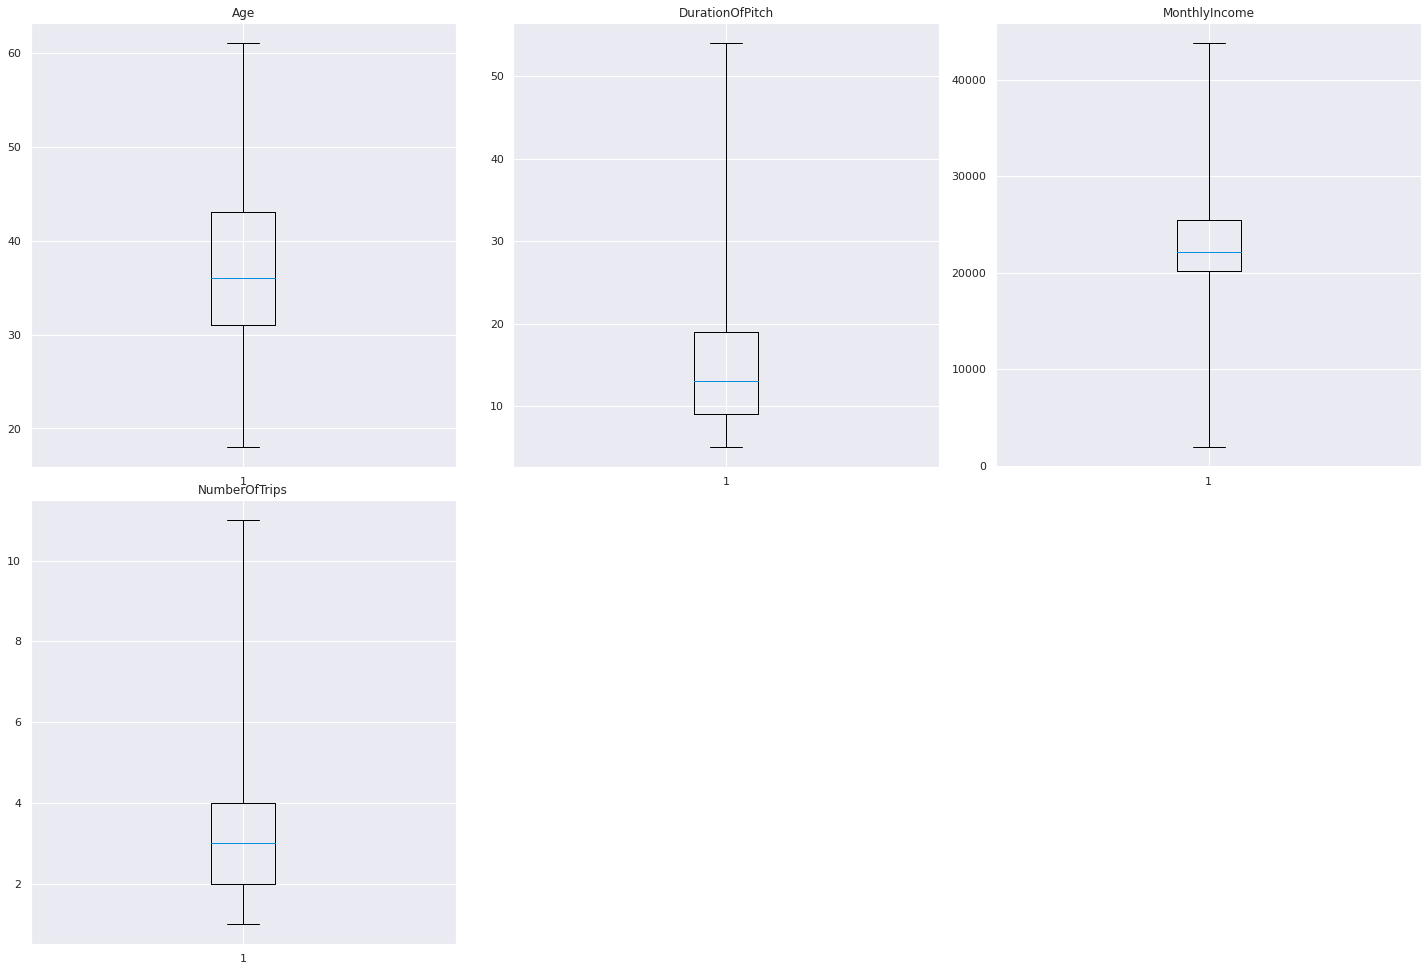

In [137]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,20))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(3,3,i+1)
                     plt.boxplot(data[variable],whis=3.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Observations
Bye bye outliers!

# Build thee Model

# Split the data into train and test sets


In [138]:
X = data.drop("ProdTaken", axis=1)
y = data.pop("ProdTaken")

In [139]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.30,stratify=y,random_state=42)

In [140]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [142]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #f1-Score of the model
    train_f1_score = metrics.f1_score(y_train,pred_train)
    test_f1_score = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1_score,test_f1_score))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))
        
    return score_list # returning the list with train and test scores


### Build Decision Tree Model

In [143]:
DTModel = DecisionTreeClassifier(criterion='gini',class_weight={0:0.18,1:0.82},random_state=1)
DTModel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.18, 1: 0.82},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [144]:
#Using above defined function to get accuracy, recall and precision on train and test set
Decision_Tree_Score=get_metrics_score(DTModel)

Accuracy on training set :  1.0
Accuracy on test set :  0.880027266530334
Recall on training set :  1.0
Recall on test set :  0.644927536231884
Precision on training set :  1.0
Precision on test set :  0.6953125
F1 Score on training set :  1.0
F1 Score on test set :  0.6691729323308271


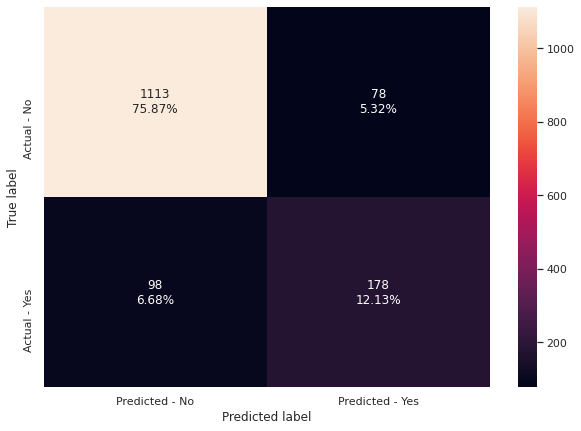

In [145]:
make_confusion_matrix(DTModel,y_test)

## Observations
 - DT is overfit on training data. need hyper tune magic

In [146]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1,class_weight = {0:.18,1:.82})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(10,15),
           'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            #'min_impurity_decrease': [0.000001,0.00001,0.0001],
           # 'max_features': ['log2','sqrt']
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'min_samples_split':[70,80,90,100],
    #'max_leaf_nodes' : [5, 10,15,20,25,30],
    #'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.18, 1: 0.82},
                       criterion='entropy', max_depth=12, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=70, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='random')

In [147]:
#Using above defined function to get accuracy, recall and precision on train and test set
Decision_Tree_Tuned_Score=get_metrics_score(dtree_tuned)

Accuracy on training set :  0.715287927506577
Accuracy on test set :  0.6734832992501704
Recall on training set :  0.8059006211180124
Recall on test set :  0.6956521739130435
Precision on training set :  0.3793859649122807
Precision on test set :  0.3270868824531516
F1 Score on training set :  0.5159045725646123
F1 Score on test set :  0.44495944380069524


### Observation
- No more overfitting!!!


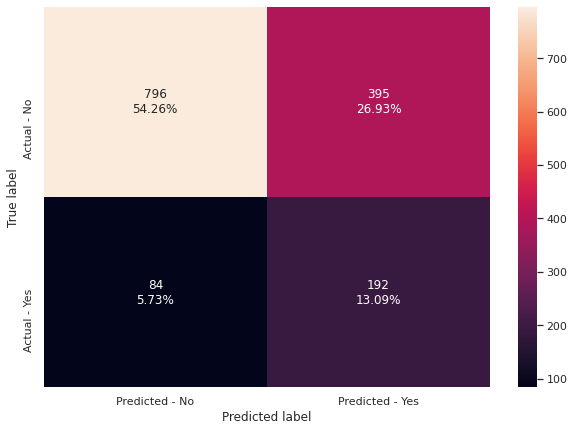

In [148]:
make_confusion_matrix(dtree_tuned,y_test)

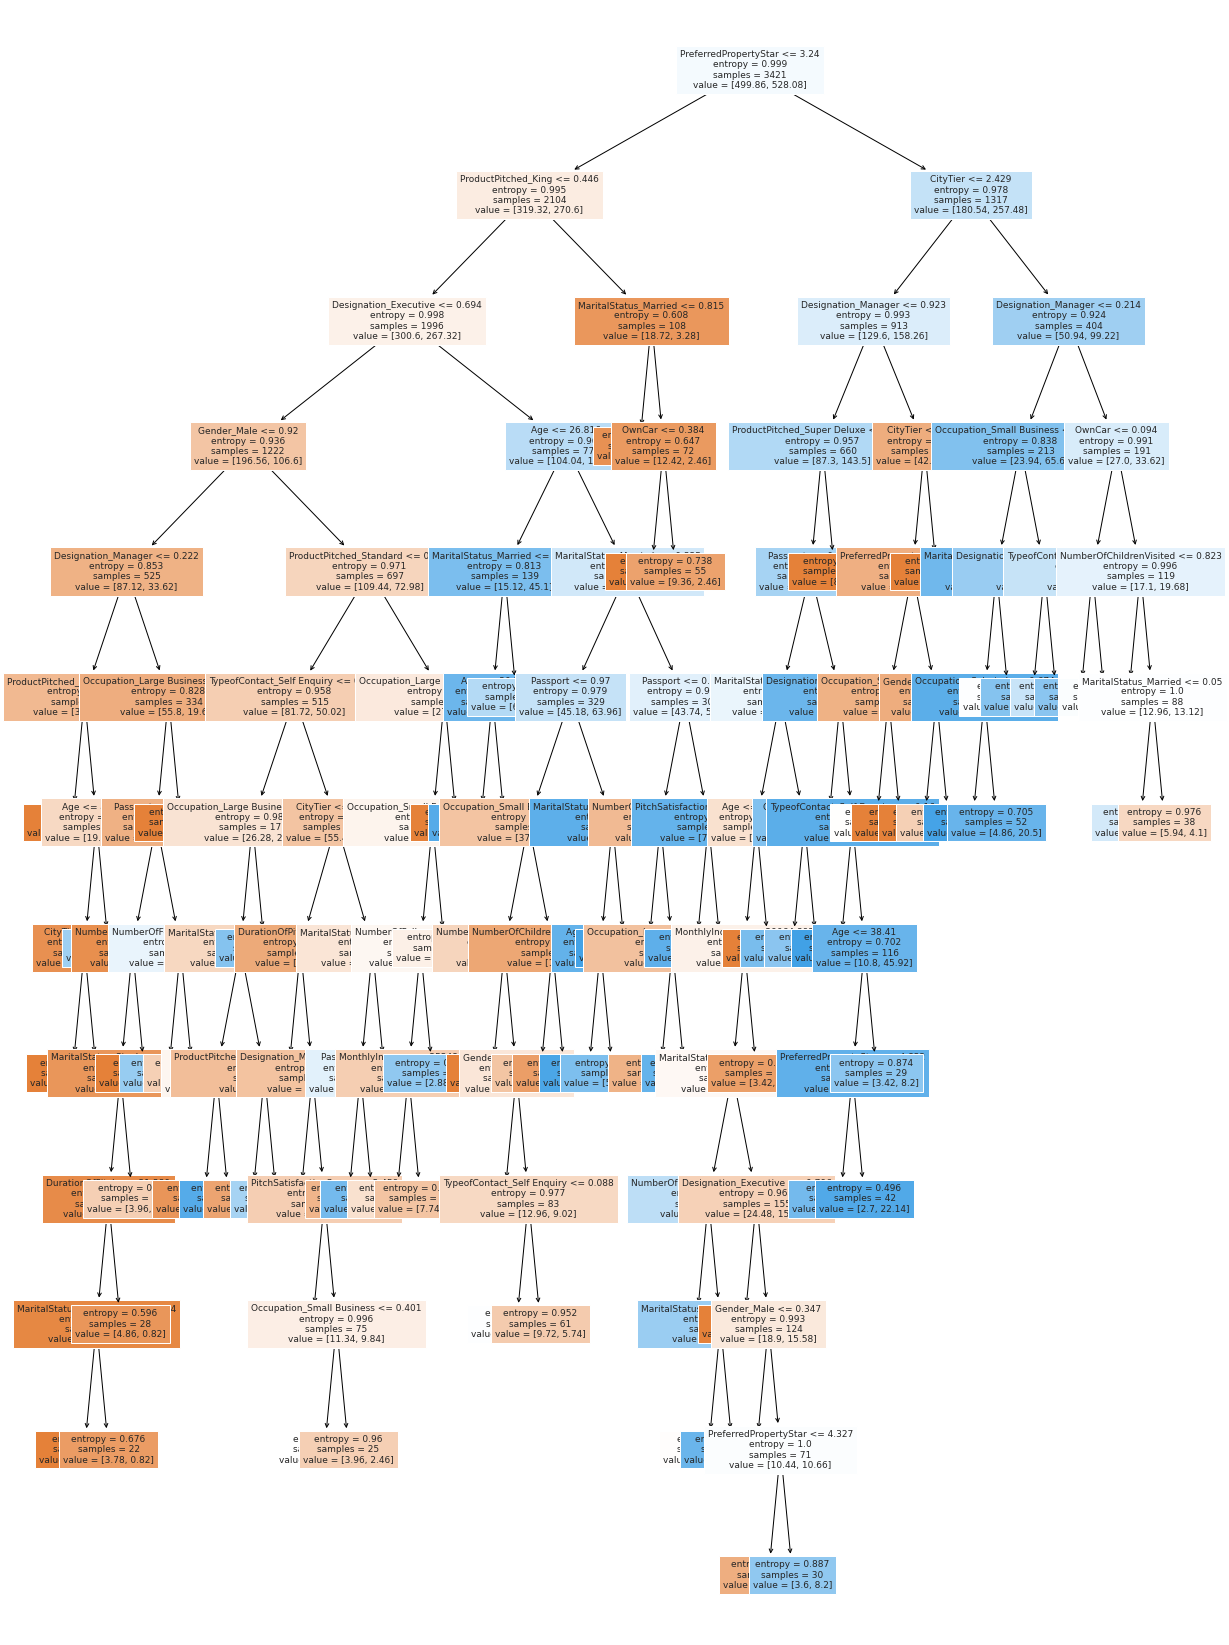

In [151]:
# View the Decision tree 
column_names = list(X.columns)
feature_names = column_names
plt.figure(figsize=(20,30))
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [152]:
# Find gini importance for features
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.258177
Designation_Executive        0.120313
Designation_Manager          0.076515
Age                          0.074581
PreferredPropertyStar        0.051505
ProductPitched_Super Deluxe  0.046642
MaritalStatus_Married        0.036346
CityTier                     0.032198
MaritalStatus_Single         0.031590
Occupation_Salaried          0.031412
Occupation_Large Business    0.030155
NumberOfFollowups            0.029413
Gender_Male                  0.028188
ProductPitched_Standard      0.025125
ProductPitched_King          0.023081
DurationOfPitch              0.019688
NumberOfPersonVisited        0.016901
MaritalStatus_Unmarried      0.015093
TypeofContact_Self Enquiry   0.014525
PitchSatisfactionScore       0.012064
NumberOfTrips                0.007665
Occupation_Small Business    0.007518
MonthlyIncome                0.003814
OwnCar                       0.003538
NumberOfChildrenVisited      0.001979
Designation_

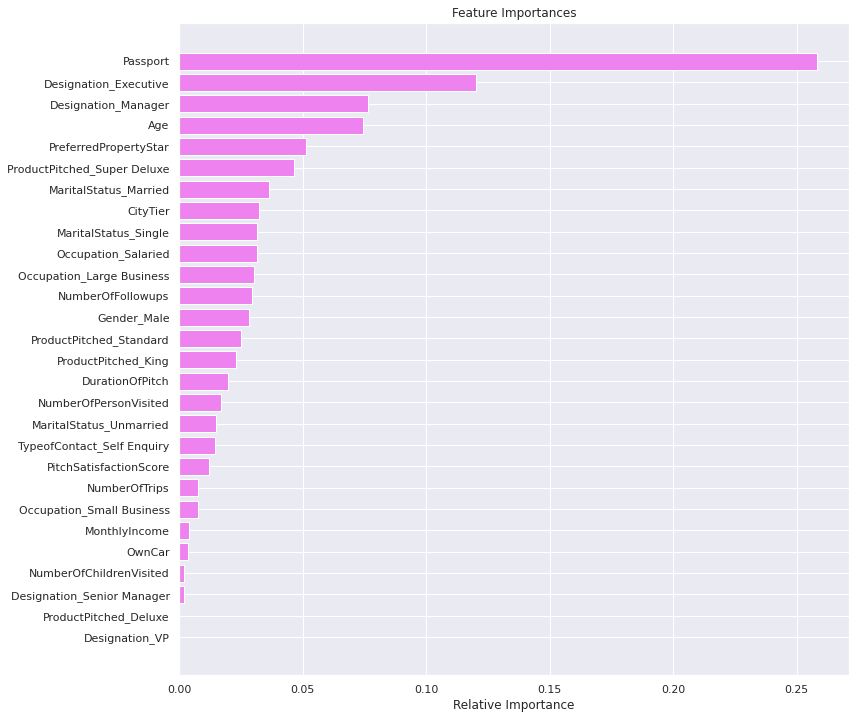

In [153]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Top features are : Passport,Designation_Executive, Age, CityTier,Preferred PropertyStar 

# Building various ensemble models


## Bagging Classifier

In [154]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [155]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9932768196433791
Accuracy on test set :  0.918200408997955
Recall on training set :  0.9658385093167702
Recall on test set :  0.6739130434782609
Precision on training set :  0.9983948635634029
Precision on test set :  0.8611111111111112
F1 Score on training set :  0.9818468823993686
F1 Score on test set :  0.7560975609756099


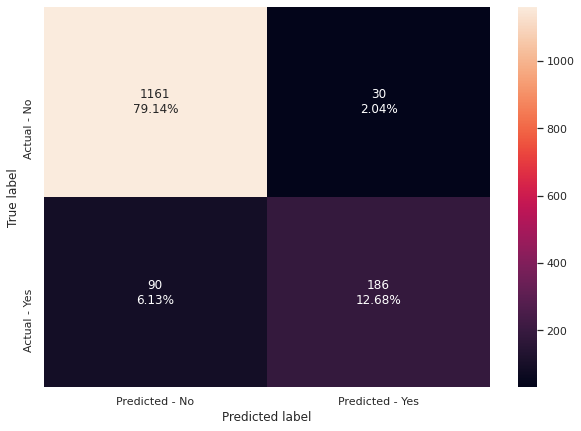

In [156]:
make_confusion_matrix(bagging_estimator,y_test)

We see that BaggingClassifier is overfitting the training data

### Random Forest Classifier

In [157]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [158]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9011588275391956
Recall on training set :  1.0
Recall on test set :  0.5507246376811594
Precision on training set :  1.0
Precision on test set :  0.8786127167630058
F1 Score on training set :  1.0
F1 Score on test set :  0.6770601336302895


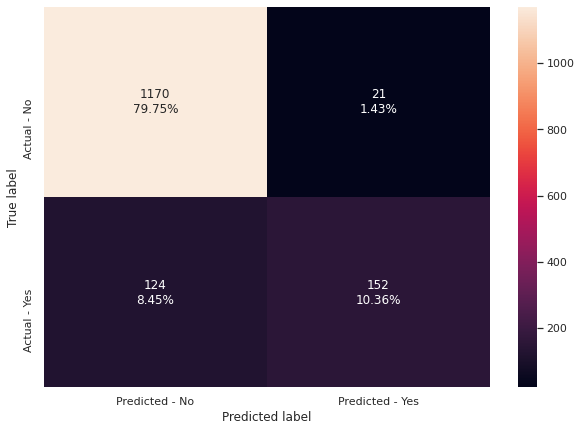

In [159]:
make_confusion_matrix(rf_estimator,y_test)

###  Observations:

- Bagging + Random Forest classifier overfit training data with default params
- Both bagging + Random Forrest give similarish accuracy
- Bagging gives better recall+precisiion

## Tune Hyperparameter to get better results

In [160]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.9, max_samples=0.9, n_estimators=30,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [163]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)


Accuracy on training set :  0.997953814674072
Accuracy on test set :  0.9100204498977505
Recall on training set :  0.9891304347826086
Recall on test set :  0.6231884057971014
Precision on training set :  1.0
Precision on test set :  0.86
F1 Score on training set :  0.994535519125683
F1 Score on test set :  0.7226890756302521


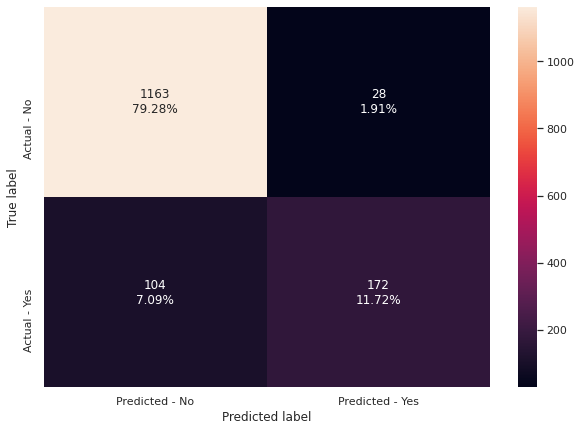

In [164]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Observations
- Bagging have slight improvement for {accuracy,precision, recall} after hyperparam tuning
- model overfits data


In [166]:
# Try logilist regreesion to se if it is better
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=1,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
   

In [167]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8427360420929553
Accuracy on test set :  0.830947511929107
Recall on training set :  0.2546583850931677
Recall on test set :  0.2463768115942029
Precision on training set :  0.7387387387387387
Precision on test set :  0.6296296296296297
F1 Score on training set :  0.37875288683602776
F1 Score on test set :  0.35416666666666674


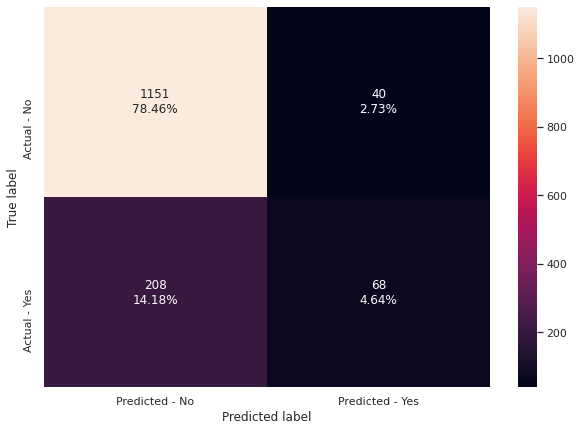

In [168]:
make_confusion_matrix(bagging_lr,y_test)

### Insights

- Bagging class with LR as base_estimator does not overfit the test data
- High diff in precision on test data, f1 scores low - underfit

### Random Forest Classifier - HyperTuning

In [ ]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": [5,6,7,8,9],
    "max_features": [0.2,0.3,0.4,0.5,0.6],
    "max_samples": [0.3,0.4,0.5,0.6]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

In [194]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9187372113417129
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.6009316770186336
Recall on test set :  0.40217391304347827
Precision on training set :  0.9485294117647058
Precision on test set :  0.7551020408163265
F1 Score on training set :  0.7357414448669202
F1 Score on test set :  0.524822695035461


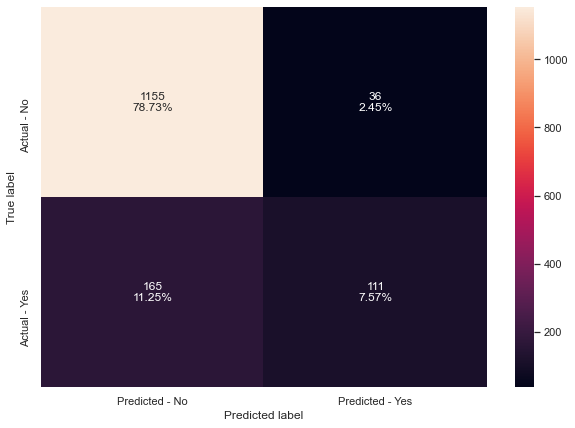

In [195]:

make_confusion_matrix(rf_estimator_tuned,y_test)

### Insights:
We can see that random forest's performance has increased as compared to the random forest model with default parameters.
Model is slightly overfitting the data but not as much as the tuned bagging classifier.
The test recall is still very low. This means that the model is not good at identifying potential customers.
There is huge difference between train and test precision indicating the model is overfitting. 

Let's try using class_weights for random forest:
The model performance is not very good. This may be due to the fact that the classes are imbalanced with 82% non-potential customers and 18% potential customers.

We should make the model aware that the class of interest here is 'potential customers'.

We can do so by passing the parameter class_weights available for random forest. This parameter is not available for the bagging classifier.

class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

We can choose class_weights={0:0.18,1:0.82} because that is the original imbalance in our data.

In [196]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.18, 1: 0.82}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": [5,6,7,8,9],
    "max_features": [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
    "max_samples": [0.3,0.4,0.5,0.6],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features=0.4,
                       max_samples=0.6, min_samples_leaf=9, random_state=1)

In [197]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8897983045893014
Accuracy on test set :  0.8241308793456033
Recall on training set :  0.8369565217391305
Recall on test set :  0.605072463768116
Precision on training set :  0.6646115906288532
Precision on test set :  0.5284810126582279
F1 Score on training set :  0.740893470790378
F1 Score on test set :  0.5641891891891893


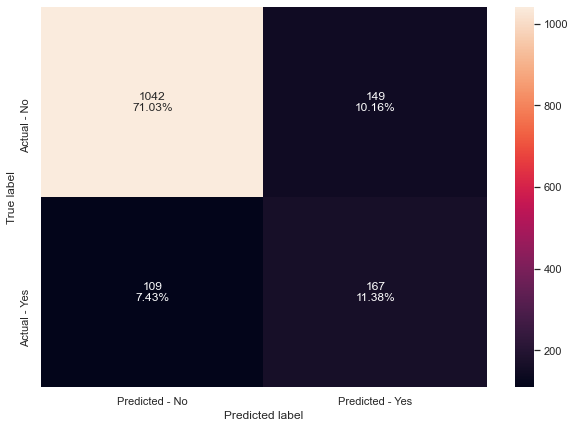

In [198]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Insights
The model accuracy has decreased a bit but the overfitting has also been reduced and the model is generalizing well.
The train and test recall both have increased significantly.The Precision has decreased but the f1-score has improved slightly.
We can see from the confusion matrix that the random forest model with class weights is now better at identifying the potential customers as compared to other models.

In [199]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator_weighted.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.160249
Age                          0.110462
DurationOfPitch              0.097228
Designation_Executive        0.092186
MonthlyIncome                0.089233
CityTier                     0.056613
PreferredPropertyStar        0.056591
NumberOfTrips                0.043482
PitchSatisfactionScore       0.043194
NumberOfFollowups            0.038833
MaritalStatus_Single         0.031259
MaritalStatus_Married        0.023780
Gender_Male                  0.018654
ProductPitched_Deluxe        0.013379
Designation_Manager          0.012751
Occupation_Salaried          0.012736
Occupation_Large Business    0.012363
TypeofContact_Self Enquiry   0.011614
MaritalStatus_Unmarried      0.011467
NumberOfPersonVisited        0.011426
OwnCar                       0.011101
Occupation_Small Business    0.011072
NumberOfChildrenVisited      0.010680
Designation_Senior Manager   0.007695
ProductPitched_Standard      0.006364
ProductPitch

### Checking the feature importance¶

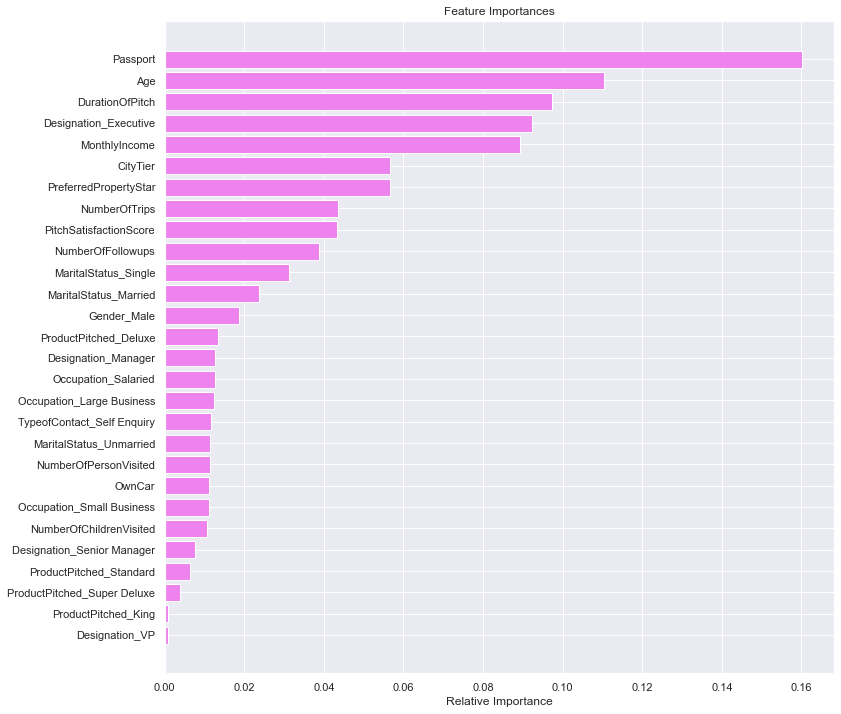

In [200]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport, Age and Duration of Pitch are the top 3 features.

### Comparing all models till now

In [201]:
# defining list of models
models = [DTModel,dtree_tuned,bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train=[]
f1_score_test=[]


# looping through all the models to get the accuracy, precall and precision and f1- scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_score_train.append(np.round(j[6],2))
    f1_score_test.append(np.round(j[7],2))
    

In [202]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree Model','Tuned Decision Tree','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_f1_score':f1_score_train,'Test_f1_score':f1_score_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                         Decision Tree Model            1.00           0.89   
1                         Tuned Decision Tree            0.76           0.72   
2  Bagging classifier with default parameters            0.99           0.92   
3                    Tuned Bagging Classifier            1.00           0.91   
4   Bagging classifier with base_estimator=LR            0.85           0.83   
5       Random Forest with deafult parameters            1.00           0.90   
6              Tuned Random Forest Classifier            0.92           0.86   
7            Random Forest with class_weights            0.89           0.82   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1_score  \
0          1.00         0.63             1.00            0.72            1.00   
1          0.81         0.68             0.42            0.37            0.56   
2          0.97         0.68             1.00            0.86            0.98   
3          0.99         0.61             1.00            0.88            1.00   
4          0.29         0.26             0.73            0.61            0.42   
5          1.00         0.55             1.00            0.88            1.00   
6          0.60         0.40             0.95            0.76            0.74   
7          0.84         0.61             0.66            0.53            0.74   

   Test_f1_score  
0           0.68  
1           0.48  
2           0.76  
3           0.72  
4           0.36  
5           0.68  
6           0.52  
7           0.56

### Building Boosting Methods
- We are going to build 3 boosting models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a potential customer as non potential customer.


## AdaBoost Classifier

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.30,stratify=y,random_state=42)

In [204]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [205]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8570593393744519
Accuracy on test set :  0.8302658486707567
Recall on training set :  0.3804347826086957
Recall on test set :  0.29347826086956524
Precision on training set :  0.7313432835820896
Precision on test set :  0.6
F1 Score on training set :  0.5005107252298263
F1 Score on test set :  0.39416058394160586


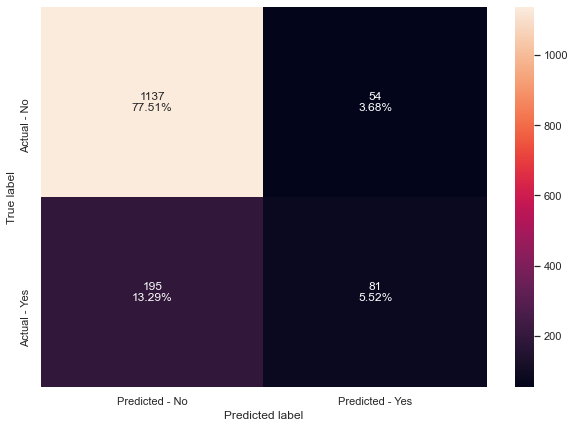

In [206]:
make_confusion_matrix(abc,y_test)

## Gradient Boosting Classifier

In [207]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [208]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8897983045893014
Accuracy on test set :  0.8520790729379687
Recall on training set :  0.4968944099378882
Recall on test set :  0.358695652173913
Precision on training set :  0.8579088471849866
Precision on test set :  0.7122302158273381
F1 Score on training set :  0.6293018682399214
F1 Score on test set :  0.47710843373493966


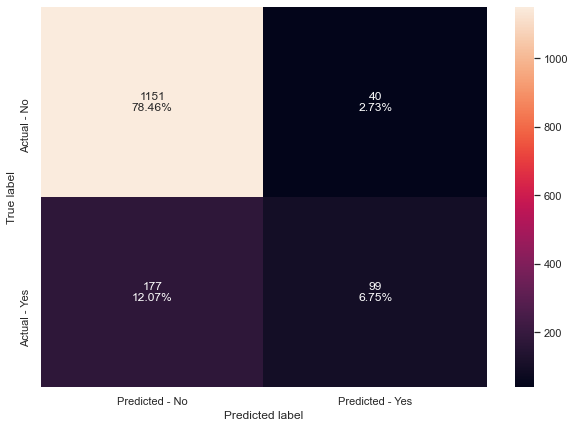

In [209]:
make_confusion_matrix(gbc,y_test)

## XGBoost Classifier

In [210]:
xgb = XGBClassifier(eval_metric = "logloss",use_label_encoder=False,random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [211]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.912747102931152
Recall on training set :  0.9968944099378882
Recall on test set :  0.6485507246376812
Precision on training set :  1.0
Precision on test set :  0.8523809523809524
F1 Score on training set :  0.9984447900466563
F1 Score on test set :  0.736625514403292


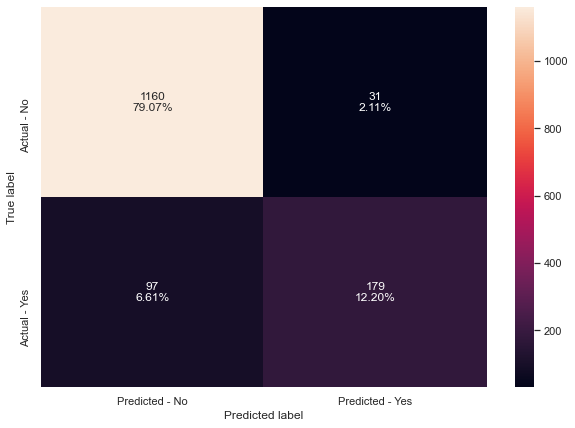

In [212]:
make_confusion_matrix(xgb,y_test)

##### With default parameters:

XGBoost classifier has better test accuracy and better Recall among these 3 models, but is overfitting on train data.
Of all three models, Adaboost has least test accuracy and test recall.

### Hyperparameter Tuning
### AdaBoost Classifier
- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    * base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    * n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    * learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [213]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

In [214]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9885998246126864
Accuracy on test set :  0.8793456032719836
Recall on training set :  0.9503105590062112
Recall on test set :  0.5978260869565217
Precision on training set :  0.9886914378029079
Precision on test set :  0.7142857142857143
F1 Score on training set :  0.9691211401425179
F1 Score on test set :  0.6508875739644971


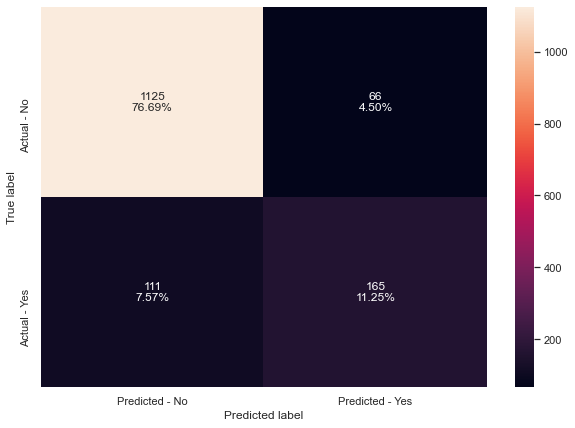

In [215]:

make_confusion_matrix(abc_tuned,y_test)

### Insights
The model is overfitting the train data as train accuracy,train recall,train precision is much higher than the test accuracy, test recall and test precision.
The model is slightly overfitting.

In [216]:
# importance of features in the tree building

print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))



                                  Imp
MonthlyIncome                0.275644
Age                          0.136991
DurationOfPitch              0.122789
PitchSatisfactionScore       0.063600
NumberOfTrips                0.051955
Gender_Male                  0.041313
NumberOfFollowups            0.040540
PreferredPropertyStar        0.033258
Designation_Executive        0.028656
Passport                     0.023137
CityTier                     0.020931
TypeofContact_Self Enquiry   0.020685
NumberOfChildrenVisited      0.017205
OwnCar                       0.015766
Occupation_Small Business    0.014056
Occupation_Salaried          0.013280
MaritalStatus_Single         0.011436
Occupation_Large Business    0.011357
MaritalStatus_Married        0.010061
NumberOfPersonVisited        0.009913
ProductPitched_Deluxe        0.008957
ProductPitched_Super Deluxe  0.007810
MaritalStatus_Unmarried      0.006990
Designation_Manager          0.005521
ProductPitched_Standard      0.003821
Designation_

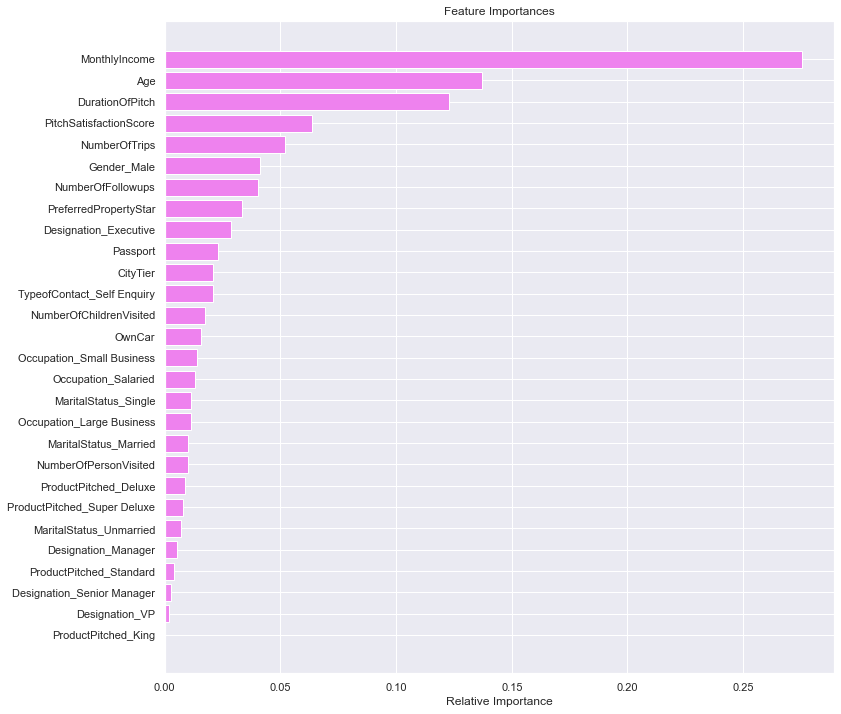

In [217]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

MonthlyIncome is the most important feature as per the tuned AdaBoost model.

### Gradient Boosting Classifier
Most of the hyperparameters available are same as random forest classifier.
init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
There is no class_weights parameter in gradient boosting.

Let's try using AdaBoost classifier as the estimator for initial predictions

In [218]:

gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [219]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8892136802104648
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.4984472049689441
Recall on test set :  0.3695652173913043
Precision on training set :  0.8514588859416445
Precision on test set :  0.6986301369863014
F1 Score on training set :  0.6287952987267386
F1 Score on test set :  0.48341232227488157


##### As compared to the model with default parameters:

Test accuracy and test recall have increased slightly.
As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [220]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

In [221]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9277988892136803
Accuracy on test set :  0.8718473074301295
Recall on training set :  0.6630434782608695
Recall on test set :  0.4528985507246377
Precision on training set :  0.9343544857768052
Precision on test set :  0.7716049382716049
F1 Score on training set :  0.7756584922797456
F1 Score on test set :  0.5707762557077626


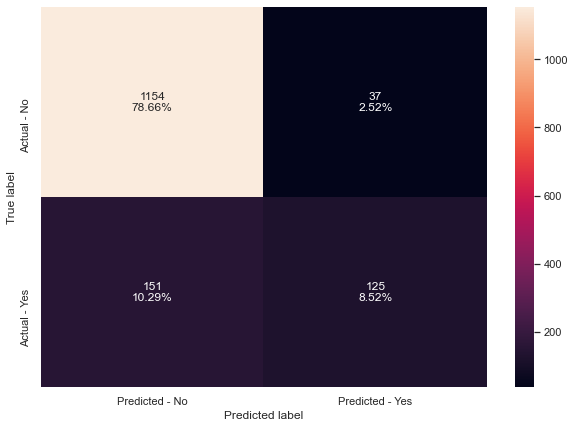

In [222]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
The model performace has improved and is not overfitting.
The model train and test precision has imrpoved.
It is better at identifying False positives.

In [223]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                  Imp
MonthlyIncome                0.165651
Passport                     0.136120
Age                          0.132986
Designation_Executive        0.121614
DurationOfPitch              0.074846
NumberOfFollowups            0.054757
CityTier                     0.049158
PreferredPropertyStar        0.045516
NumberOfTrips                0.037461
MaritalStatus_Single         0.032994
PitchSatisfactionScore       0.027305
MaritalStatus_Unmarried      0.020803
Occupation_Large Business    0.015526
Gender_Male                  0.015357
TypeofContact_Self Enquiry   0.011544
MaritalStatus_Married        0.009890
ProductPitched_Standard      0.008916
Designation_Senior Manager   0.006001
NumberOfChildrenVisited      0.005383
Occupation_Small Business    0.005150
NumberOfPersonVisited        0.004862
Designation_Manager          0.004333
Occupation_Salaried          0.004238
ProductPitched_Deluxe        0.003857
OwnCar                       0.002692
ProductPitch

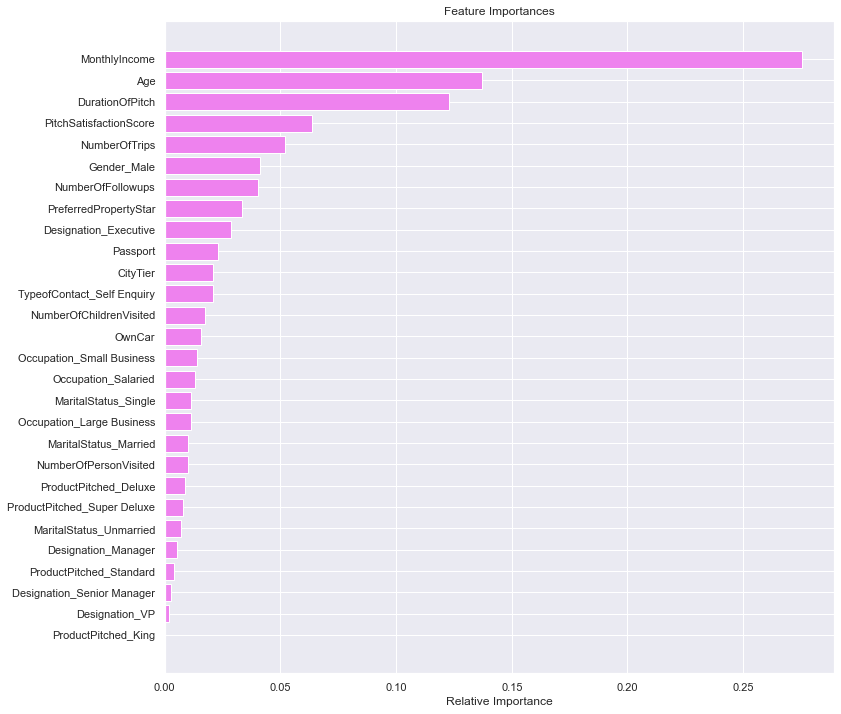

In [224]:
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

MonthlyIncome is the most important feature, followed by Age and DurationOfPitch, as per the tuned gradient boosting model

### XGBoost Classifier
XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation here. Some of the important parameters are:

* scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to ∞.
* subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
* colsample_bytree: Corresponds to the fraction of features (the columns) to use.
* colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
* colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
* max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
* learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
* gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.


In [225]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('/n Time taken: %i hours %i minute and %s seconds.' %(thour,tmin,round(tsec,2)))

In [226]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    #"n_estimators": np.arange(10,100,20),
    #"n_estimators": [10,30,50,70,90],
    "n_estimators": [1,50,100],
    "scale_pos_weight":[0,1,2,5],
    #"subsample":[0.5,0.7,0.9,1],
    "max_depth":[3,4,5,8,10,12,15],
    "learning_rate":[0.05,0.1,0.2,0.5],
    #"gamma":[0,1,3],
    #"gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.5,0.7,0.9,1]
    #"colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)



In [227]:
from datetime import datetime
start_time=timer(None)
grid_obj = grid_obj.fit(X_train, y_train)
timer(start_time)

/n Time taken: 0 hours 12 minute and 37.41 seconds.


In [228]:

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [229]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9318912598655364
Accuracy on test set :  0.8438991138377642
Recall on training set :  0.9580745341614907
Recall on test set :  0.7355072463768116
Precision on training set :  0.7496962332928311
Precision on test set :  0.5654596100278552
F1 Score on training set :  0.8411724608043626
F1 Score on test set :  0.6393700787401575


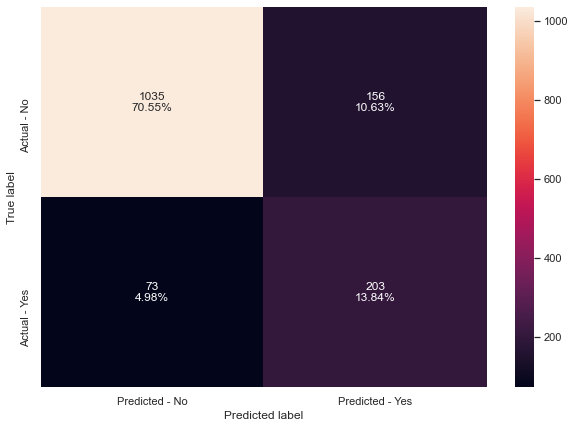

In [230]:
make_confusion_matrix(xgb_tuned,y_test)

### Insights
The test accuracy of the model has reduced as compared to the model with default parameters but the recall has increased significantly and the model is able to identify most of the potential customers.The precision has decreased but is not overfitting anymore.
Decreasing number of false negatives has increased the number of false positives here.
The tuned model is not overfitting and generalizes well.

In [231]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))



                                  Imp
Passport                     0.165111
Designation_Executive        0.126801
CityTier                     0.052116
MaritalStatus_Married        0.045593
PreferredPropertyStar        0.045417
Occupation_Large Business    0.042107
ProductPitched_Deluxe        0.041128
MaritalStatus_Unmarried      0.037262
MaritalStatus_Single         0.035901
ProductPitched_Standard      0.035176
Age                          0.033748
NumberOfFollowups            0.033352
ProductPitched_Super Deluxe  0.032282
NumberOfTrips                0.028366
PitchSatisfactionScore       0.028122
DurationOfPitch              0.027224
Gender_Male                  0.026798
MonthlyIncome                0.025614
ProductPitched_King          0.025329
TypeofContact_Self Enquiry   0.024982
Occupation_Salaried          0.020559
Occupation_Small Business    0.019453
OwnCar                       0.019064
NumberOfPersonVisited        0.015439
NumberOfChildrenVisited      0.013058
Designation_

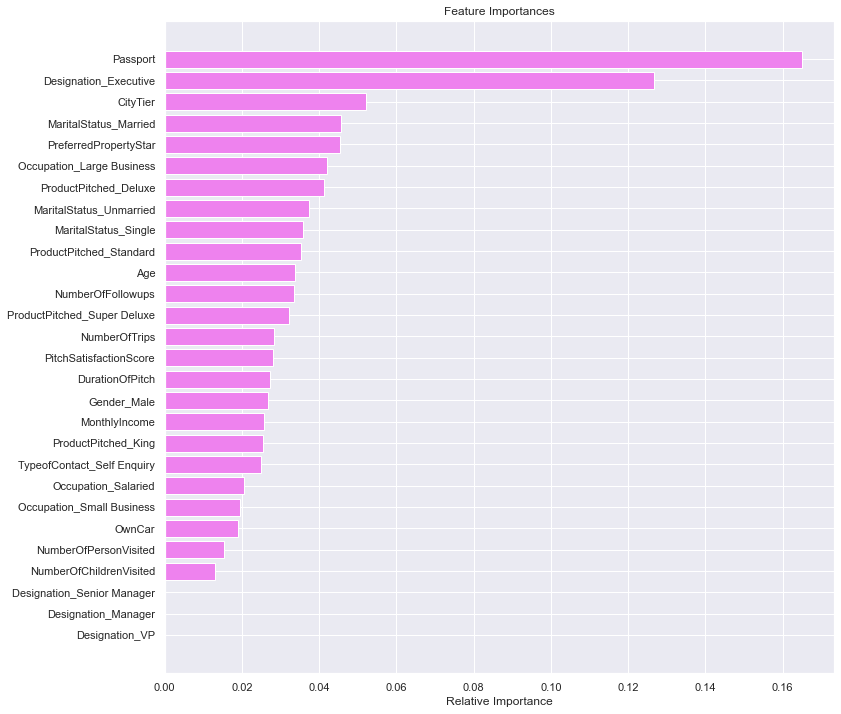

In [232]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport is the most important feature as per XGBoost model unlike AdaBoost and Gradient Boosting, where the most important feature is the MonthlyIncome.

## Stacking Model

### Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.

In [233]:
estimators=[('Decision Tree', dtree_tuned),
            ('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned),('XGBoost', xgb_tuned)]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss',use_label_encoder=False)

In [234]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=12,
                                                       max_features='sqrt',
                                                       min_samples_leaf=10,
                                                       min_samples_split=80,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.6,
                                                       max_samples=0.6,
                                                       min_samples_leaf=5,
                                                       n_estimators=250,
                                                       r

In [235]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9356913183279743
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.7950310559006211
Recall on test set :  0.5615942028985508
Precision on training set :  0.8533333333333334
Precision on test set :  0.6595744680851063
F1 Score on training set :  0.8231511254019293
F1 Score on test set :  0.6066536203522505


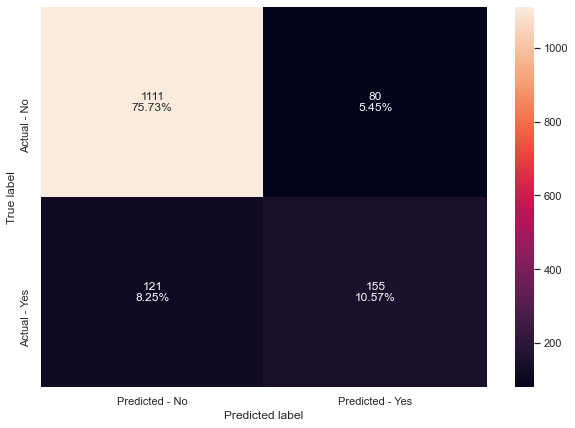

In [236]:
make_confusion_matrix(stacking_estimator,y_test)

In [237]:
estimators1=[('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned),('AdaBoost Tuned', abc_tuned)]
final_estimator1=GradientBoostingClassifier(random_state=1)

In [238]:
stacking_estimator1=StackingClassifier(estimators=estimators1, final_estimator=final_estimator1,cv=5)
stacking_estimator1.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.6,
                                                       max_samples=0.6,
                                                       min_samples_leaf=5,
                                                       n_estimators=250,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('AdaBoost Tuned',
                                AdaBoostClassifier(b

In [239]:
stacking_estimator_score1=get_metrics_score(stacking_estimator1)

Accuracy on training set :  0.9798304589301374
Accuracy on test set :  0.8807089297886844
Recall on training set :  0.9285714285714286
Recall on test set :  0.5978260869565217
Precision on training set :  0.9629629629629629
Precision on test set :  0.7205240174672489
F1 Score on training set :  0.9454545454545454
F1 Score on test set :  0.6534653465346535


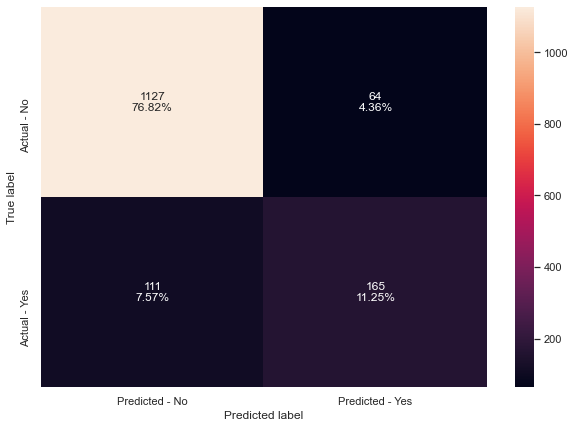

In [240]:
make_confusion_matrix(stacking_estimator1,y_test)

### Comparing all models

In [241]:
# defining list of models
models = [DTModel,dtree_tuned,bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted,abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned,stacking_estimator,stacking_estimator1]

#models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_score_train.append(np.round(j[6],2))
    f1_score_test.append(np.round(j[7],2))

In [242]:
 comparison_frame = pd.DataFrame({'Model':['Decision Tree Model','Tuned Decision Tree','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','Stacking with Tuned models','Stacking with Better precision models'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_Score':f1_score_train,'Test_F1_Score':f1_score_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                          Decision Tree Model            1.00           0.89   
1                          Tuned Decision Tree            0.76           0.72   
2   Bagging classifier with default parameters            0.99           0.92   
3                     Tuned Bagging Classifier            1.00           0.91   
4    Bagging classifier with base_estimator=LR            0.85           0.83   
5        Random Forest with deafult parameters            1.00           0.90   
6               Tuned Random Forest Classifier            0.92           0.86   
7             Random Forest with class_weights            0.89           0.82   
8              AdaBoost with default paramters            0.86           0.83   
9                               AdaBoost Tuned            0.99           0.88   
10   Gradient Boosting with default parameters            0.89           0.85   
11        Gradient Boosting with init=AdaBoost            0.89           0.85   
12                     Gradient Boosting Tuned            0.93           0.87   
13             XGBoost with default parameters            1.00           0.91   
14                               XGBoost Tuned            0.93           0.84   
15                  Stacking with Tuned models            0.94           0.86   
16       Stacking with Better precision models            0.98           0.88   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0           1.00         0.63             1.00            0.72   
1           0.81         0.68             0.42            0.37   
2           0.97         0.68             1.00            0.86   
3           0.99         0.61             1.00            0.88   
4           0.29         0.26             0.73            0.61   
5           1.00         0.55             1.00            0.88   
6           0.60         0.40             0.95            0.76   
7           0.84         0.61             0.66            0.53   
8           0.38         0.29             0.73            0.60   
9           0.95         0.60             0.99            0.71   
10          0.50         0.36             0.86            0.71   
11          0.50         0.37             0.85            0.70   
12          0.66         0.45             0.93            0.77   
13          1.00         0.65             1.00            0.85   
14          0.96         0.74             0.75            0.57   
15          0.80         0.56             0.85            0.66   
16          0.93         0.60             0.96            0.72   

    Train_F1_Score  Test_F1_Score  
0             1.00           0.68  
1             0.56           0.48  
2             0.98           0.76  
3             1.00           0.72  
4             0.42           0.36  
5             1.00           0.68  
6             0.74           0.52  
7             0.74           0.56  
8             0.50           0.39  
9             0.97           0.65  
10            0.63           0.48  
11            0.63           0.48  
12            0.78           0.57  
13            1.00           0.74  
14            0.84           0.64  
15            0.82           0.61  
16            0.95           0.65

- Tuned gradient boosting model is the better model here as model accuracy, precision and f1-score are good. 
- Tuned Random classifier,TunedGradient boosting, stacking classifier(with better precision models) 2 are the top 3 models. They are all giving better performances.

# Insights and Recommendation
* The company wants to reduce the marketing costs for the wellness travel package that is going to be introduced by targeting the potential customers. Hence, precision is the right metric to check the performance of the model. 
* However, in order to increase the revenues, the business must also take steps to prevent misclassification of the potential customers as non-customers. So, F1- score was also considered. 
* Over 70% of the contact with “Visit with us” are from self enquiries and about 30% of the people are invited by the company. However,  the people contacted by the business are more likely to purchase the travel packages compared to those who self-enquired. The business has the following opportunities to reduce the marketing costs and improve conversion.
   - Identify the sources (word of mouth, website reviews, social media recommendations, commercials) that are driving the self-enquiries and invest more in these sources. This will help them widen their reach and reduce marketing costs.
   - One third of the customers give less than average rating to the pitchsatisfaction score. The business should invest to train the associates on the packages to improve score. More knowledgeable associates will improve the perception of the company  and increase the chance of turning self-enquiring people to customers.
   - We also noticed that as the number of follow-ups increases, the likelihood of people buying the packages increases. In addition to training the associates, the business should work on improving the customer service by simplifying the purchasing process to reduce the follow ups needed to generate sales. 

*  It is recommended that “Visit by us” add attractive pictures and videos of the travel locations to impress potential customers.  They can also hire “social media influencers” to increase their reach.
*  It may be beneficial to provide the customizable wellness travel packages (3 day, 5 day, different locations, 3 star or 5 star stay, etc.) so that the customers can “build their own package” based on their convenience and financials. 
*  It is interesting to note that the Super Deluxe and King packages are not even pitched to unmarried people. We also observe exclusivity in the packages that are recommended to the customers based on their designation and salary. The business should focus more on the customer needs and recommend packages without any biases. 
   - The business must conduct surveys from all customers who contacted the business irrespective of if they purchase the package or not for the following reasons.
   - The surveys help understand the reasons the customers who enquired but did not purchase the package and help improve the offerings. 
   - By surveying the customers who purchased the package the business will have the opportunity to learn about what worked and what did not and improve on their shortcomings. They can also use this data to design tailored perks to increase customer retention and loyalty. 


